In [261]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 120)
pd.set_option('display.max_columns', 100)

raw_df = (pd.read_csv("data.csv"))
#display(raw_df.columns)
display(raw_df)

id                            listing_url       scrape_id  \
0          2818      https://www.airbnb.com/rooms/2818  20201009050447   
1         20168     https://www.airbnb.com/rooms/20168  20201009050447   
2         25428     https://www.airbnb.com/rooms/25428  20201009050447   
3         27886     https://www.airbnb.com/rooms/27886  20201009050447   
4         28871     https://www.airbnb.com/rooms/28871  20201009050447   
...         ...                                    ...             ...   
18777  45761390  https://www.airbnb.com/rooms/45761390  20201009050447   
18778  45763935  https://www.airbnb.com/rooms/45763935  20201009050447   
18779  45776325  https://www.airbnb.com/rooms/45776325  20201009050447   
18780  45777642  https://www.airbnb.com/rooms/45777642  20201009050447   
18781  45783000  https://www.airbnb.com/rooms/45783000  20201009050447   

      last_scraped                                               name  \
0       2020-10-11           Quiet Garden View Room & Super Fast WiFi   
1       2020-10-11       Studio with private bathroom in the centre 1   
2       2020-10-11    Lovely apt in City Centre (w.lift) near Jordaan   
3       2020-10-10  Romantic, stylish B&B houseboat in canal district   
4       2020-10-10                            Comfortable double room   
...            ...                                                ...   
18777   2020-10-10              Charming 1Room Apartment in Amsterdam   
18778   2020-10-10         clean and light apartment nearby the water   
18779   2020-10-13   A beautiful spacious room on a central location.   
18780   2020-10-13                                Studio in Amsterdam   
18781   2020-10-10             Spacious and cozy apartment in De Pijp   

                                             picture_url    host_id  \
0      https://a0.muscache.com/pictures/10272854/8dcc...       3159   
1      https://a0.muscache.com/pictures/69979628/fd6a...      59484   
2      https://a0.muscache.com/pictures/138431/7079a9...      56142   
3      https://a0.muscache.com/pictures/02c2da9d-660e...      97647   
4      https://a0.muscache.com/pictures/160889/362340...     124245   
...                                                  ...        ...   
18777  https://a0.muscache.com/pictures/766447f8-1ec7...  310835509   
18778  https://a0.muscache.com/pictures/8b4d4ef5-8b9f...     961670   
18779  https://a0.muscache.com/pictures/4339516f-0f3b...   48168060   
18780  https://a0.muscache.com/pictures/2ef85d3f-9c1e...   75268907   
18781  https://a0.muscache.com/pictures/adfb4e2b-2428...  371160113   

                                          host_url   host_name  host_since  \
0           https://www.airbnb.com/users/show/3159      Daniel  2008-09-24   
1          https://www.airbnb.com/users/show/59484   Alexander  2009-12-02   
2          https://www.airbnb.com/users/show/56142        Joan  2009-11-20   
3          https://www.airbnb.com/users/show/97647        Flip  2010-03-23   
4         https://www.airbnb.com/users/show/124245       Edwin  2010-05-13   
...                                            ...         ...         ...   
18777  https://www.airbnb.com/users/show/310835509  TravelNest  2019-11-20   
18778     https://www.airbnb.com/users/show/961670        Lisa  2011-08-12   
18779   https://www.airbnb.com/users/show/48168060         Tim  2015-11-04   
18780   https://www.airbnb.com/users/show/75268907        Emma  2016-06-01   
18781  https://www.airbnb.com/users/show/371160113     Nadezda  2020-10-08   

                                   host_location  host_response_time  \
0      Amsterdam, Noord-Holland, The Netherlands                 NaN   
1      Amsterdam, Noord-Holland, The Netherlands                 NaN   
2              New York, New York, United States  within a few hours   
3      Amsterdam, Noord-Holland, The Netherlands                 NaN   
4      Amsterdam, Noord-Holland, The Netherlands      within an hour   
...                      

In [262]:
# Определяем стратегии трансформации данных
# Сама трансформация определена в mappers.py
# TODO: Разобраться с категориальными переменными

col_strategies = {
#     'id': 'Ignore',
#     'listing_url': 'Ignore',
#     'scrape_id': 'Ignore',
#     'last_scraped': 'Ignore',
#     'name': 'Ignore',
#     'picture_url': 'Ignore',
#     'host_id': 'Ignore',
#     'host_url': 'Ignore',
#     'host_name': 'Ignore',
#     'host_since': 'Ignore',
#     'host_location': 'Ignore',
#     'host_response_time': 'Ignore',
#     'host_response_rate': 'Percentage', #Очень много пропущенных! 67%
#     'host_acceptance_rate': 'Percentage', #Очень много пропущенных! 44%
    'host_is_superhost': 'Boolean',
#     'host_thumbnail_url': 'Ignore',
#     'host_picture_url': 'Ignore',
#     'host_neighbourhood': 'Ignore',
    'host_listings_count': 'Float',
#     'host_total_listings_count': 'Ignore',
#     'host_verifications': 'Ignore',
   'host_has_profile_pic': 'Boolean',
    'host_identity_verified': 'Boolean',
#     'neighbourhood': 'Ignore',
    'neighbourhood_cleansed': 'Id',
#     'neighbourhood_group_cleansed': 'Id',
#     'latitude': 'Ignore',
#     'longitude': 'Ignore',
    'property_type': 'Id',
   'room_type': 'Id',
    'accommodates': 'Float',
#     'bathrooms': 'Float', #Очень много пропущенных! 100%!!!
    'bathrooms_text': 'Id',
    'bedrooms': 'Float',
    'beds': 'Float',
    'amenities': 'Id',
    'price': 'Price',
    'minimum_nights': 'Float',
    'maximum_nights': 'Float',
#     'minimum_minimum_nights': 'Ignore',
#     'maximum_minimum_nights': 'Ignore',
#     'minimum_maximum_nights': 'Ignore',
#     'maximum_maximum_nights': 'Ignore',
#     'minimum_nights_avg_ntm': 'Ignore',
#     'maximum_nights_avg_ntm': 'Ignore',
#     'calendar_updated': 'Ignore',
   'has_availability': 'Boolean',
    'availability_30': 'Float',
    'availability_60': 'Float',
    'availability_90': 'Float',
#     'availability_365': 'Ignore',
#     'calendar_last_scraped': 'Ignore',
    'number_of_reviews': 'Float',
#     'number_of_reviews_ltm': 'Ignore',
#     'number_of_reviews_l30d': 'Ignore',
#     'first_review': 'Ignore',
#     'last_review': 'Ignore',
    'review_scores_rating': 'Float',
    'review_scores_accuracy': 'Float',
    'review_scores_cleanliness': 'Float',
    'review_scores_checkin': 'Float',
    'review_scores_communication': 'Float',
    'review_scores_location': 'Float',
    'review_scores_value': 'Float',
#     'license': 'Id',  #Очень много пропущенных! 100%!!!
    'instant_bookable': 'Boolean',
#     'calculated_host_listings_count': 'Ignore',
#     'calculated_host_listings_count_entire_homes': 'Ignore',
#     'calculated_host_listings_count_private_rooms': 'Ignore',
#     'calculated_host_listings_count_shared_rooms': 'Ignore',
    'reviews_per_month': 'Float',
}

import mappers
import importlib
importlib.reload(mappers)
import warnings
warnings.filterwarnings("ignore", 'This pattern has match groups')

index = range(0, len(raw_df));
df = pd.DataFrame([], index=index)

for col_name in raw_df.columns:
    col_strategy = col_strategies.get(col_name, None)
    if (col_strategy is not None):
        mapped_column = mappers.map_column(raw_df[col_name], col_strategy)
#         display(mapped_column)
        if (mapped_column is not None):
            df = df.join(mapped_column.reindex(index))
    
# Что-то делаем с данными
# df['price'] = np.log(df['price'])
    
#display(df)

In [263]:
from collections import defaultdict
PROPERTY_MAPPING = defaultdict(lambda: 'Other')

PROPERTY_MAPPING.update({
    'Entire apartment': 'Apartment',
    'Entire loft': 'Apartment',
    'Entire condominium': 'Apartment',
    'Entire serviced apartment':'Apartment',
    'Entire townhouse': 'House',
    'Entire house': 'House',
    'Private room in house': 'Room',
    'Private room in bed and breakfast': 'Room',
    'Private room in townhouse':'Room',
    'Private room in apartment': 'Room',
})

df['property_type_computed'] = df['property_type'].map(PROPERTY_MAPPING)


FREQ_MAPPING = defaultdict(lambda: 'Other')

FREQ_MAPPING.update({
    'Entire apartment': 'Entire apartment',
    'Entire loft': 'Entire loft',
    'Entire condominium': 'Entire condominium',
    'Entire serviced apartment':'Entire serviced apartment',
    'Entire townhouse': 'Entire townhouse',
    'Entire house': 'Entire house',
    'Private room in house': 'Private room in house',
    'Private room in bed and breakfast': 'Private room in bed and breakfast',
    'Private room in townhouse':'Private room in townhouse',
    'Private room in apartment': 'Private room in apartment',
})

df['property_type_freq'] = df['property_type'].map(FREQ_MAPPING)

In [264]:
amenities_list = list(df.amenities)
amenities_list_string = " ".join(amenities_list)
amenities_list_string = amenities_list_string.replace('{', '')
amenities_list_string = amenities_list_string.replace('}', ',')
amenities_list_string = amenities_list_string.replace('"', '')
amenities_list_string = amenities_list_string.replace('] [', ',')
amenities_set = [x.strip() for x in amenities_list_string.split(',')]
amenities_set = set(amenities_set)

regex_mapping = {
    '24-hour check-in': 'check_in_24h',
    'Air conditioning|Central air conditioning': 'air_conditioning',
    'Amazon Echo|Apple TV|Game console|Netflix|Projector and screen|Smart TV': 'high_end_electronics',
    'BBQ grill|Fire pit|Propane barbeque': 'bbq',
    'Balcony|Patio': 'balcony',
    'Beach view|Beachfront|Lake access|Mountain view|Ski-in/Ski-out|Waterfront': 'nature_and_views',
    'Bed linens': 'bed_linen',
    'Breakfast': 'breakfast',
    'TV': 'tv',
    'Coffee maker|Espresso machine': 'coffee_machine',
    'Cooking basics': 'cooking_basics',
    'Dishwasher|Dryer|Washer': 'white_goods',
    'Elevator': 'elevator',
    'Exercise equipment|Gym|gym': 'gym',
    'Family/kid friendly|Children|children': 'child_friendly',
    'parking': 'parking',
    'Garden|Outdoor|Sun loungers|Terrace': 'outdoor_space',
    'Host greets you': 'host_greeting',
    'Hot tub|Jetted tub|hot tub|Sauna|Pool|pool': 'hot_tub_sauna_or_pool',
    'Internet|Pocket wifi|Wifi': 'internet',
    'Long term stays allowed': 'long_term_stays',
    'Pets|pet|Cat(s)|Dog(s)': 'pets_allowed',
    'Private entrance': 'private_entrance',
    'Safe|Security system': 'secure',
    'Self check-in': 'self_check_in',
    'Smoking allowed': 'smoking_allowed',
    'Step-free access|Wheelchair|Accessible': 'accessible',
    'Suitable for events': 'event_suitable',
}

for regex, value in regex_mapping.items():
    df.loc[df['amenities'].str.contains(regex), value] = 1

cols_to_replace_nulls = df.iloc[:,df.columns.get_loc("check_in_24h"):].columns
df[cols_to_replace_nulls] = df[cols_to_replace_nulls].fillna(0)

infrequent_amenities = []
for col in df.iloc[:,df.columns.get_loc("check_in_24h"):].columns:
    if df[col].sum() < len(df)/10:
        infrequent_amenities.append(col)
# print(infrequent_amenities)

df.drop(infrequent_amenities, axis=1, inplace=True)

# df.drop('amenities', axis=1, inplace=True)

INCLUDED_AMENITIES = list(set(regex_mapping.values()).difference(amenities_set, infrequent_amenities))

print(INCLUDED_AMENITIES)

['internet', 'parking', 'cooking_basics', 'coffee_machine', 'bed_linen', 'tv', 'balcony', 'long_term_stays', 'host_greeting', 'outdoor_space', 'white_goods', 'private_entrance']


In [265]:
# Заполняем отсутствующие рейтинги
df['review_scores_rating'] = df['review_scores_rating'].fillna(0)

df['review_scores_rating_norm'] = df['review_scores_rating'].astype('float').div(100)

In [266]:
# Разделяем жилье с приватными уборными
df['has_private_bathroom'] = ~df['bathrooms_text'].str.contains('shared').astype(bool)
df['has_private_bathroom'] = df['has_private_bathroom'].astype('int')

In [267]:
# Смотрим процент пропущенных значений
df.isna().mean().round(4).multiply(100)

host_is_superhost               0.30
host_listings_count             0.30
host_has_profile_pic            0.30
host_identity_verified          0.30
neighbourhood_cleansed          0.00
property_type                   0.00
room_type                       0.00
accommodates                    0.00
bathrooms_text                  0.03
bedrooms                        5.26
beds                            0.50
amenities                       0.00
price                           0.00
minimum_nights                  0.00
maximum_nights                  0.00
has_availability                0.00
availability_30                 0.00
availability_60                 0.00
availability_90                 0.00
number_of_reviews               0.00
review_scores_rating            0.00
review_scores_accuracy         13.59
review_scores_cleanliness      13.59
review_scores_checkin          13.64
review_scores_communication    13.59
review_scores_location         13.62
review_scores_value            13.62
i

In [268]:
df['has_private_bathroom'] = ~df['bathrooms_text'].str.contains('shared').astype(bool)
df['has_private_bathroom'] = df['has_private_bathroom'].astype('int')

In [269]:
orig_len = len(df)

# Убираем пропущенные
no_na_df = df.dropna()
# print('Percentage left: ' + str(100 * (len(no_na_df)/orig_len)))
df = no_na_df

# Дропаем листинги с ценой 0 - они бессмысленны
non_zero_df = df.loc[df['price'] > 0]
# print('Percentage left: ' + str(100 * (len(non_zero_df)/orig_len)))
df=non_zero_df

# Дропаем листинги без доступных бронирований
available_df = df.loc[df['has_availability'] != 0]
# print('Percentage left: ' + str(100 * (len(available_df)/orig_len)))
df=available_df

# Дропаем листинги с ценой 0 - они бессмысленны
under_1k_df = df.loc[df['price'] < 1000]
# print('Percentage left: ' + str(100 * (len(under_1k_df)/orig_len)))
df=under_1k_df

# Дропаем листинги с аномальным коолличеством спален и т.д.
beds_df = df.loc[(df['beds']<=6) & (df['accommodates']<=6) & (df['bedrooms']<=4)]
# print('Percentage left: ' + str(100 * (len(beds_df)/orig_len)))
df = beds_df

print('Percentage left: ' + str(100 * (len(df)/orig_len)))

Percentage left: 80.30028750931744


### Построение графиков данных

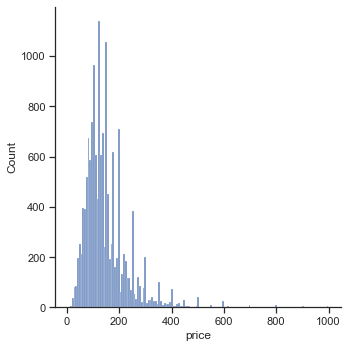

In [270]:
sns.displot(df, x="price")

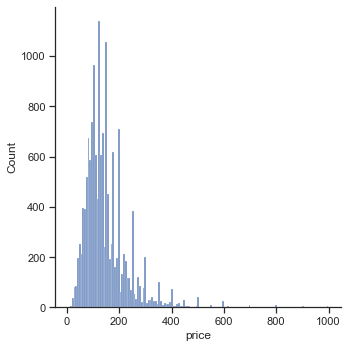

In [271]:
sns.displot(df, x="price")

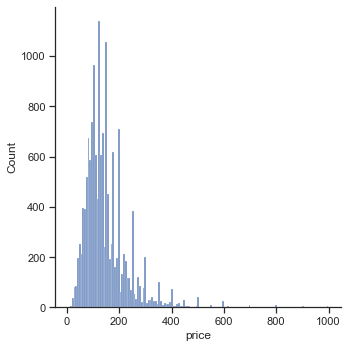

In [272]:
sns.displot(df, x="price")

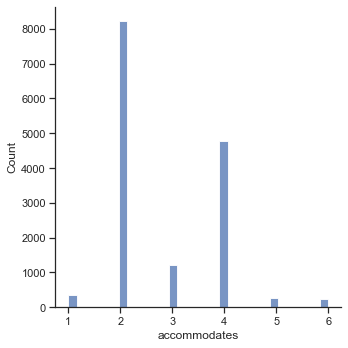

In [273]:
# sns.countplot(df.where(df['accommodates']<=6), x="accommodates", bins=7)
sns.displot(df, x="accommodates")

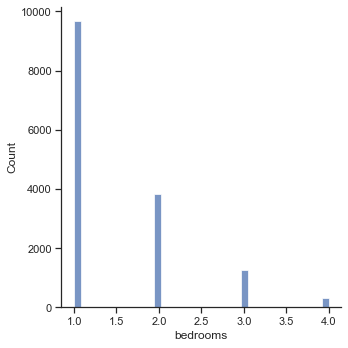

In [274]:
sns.displot(df, x="bedrooms")

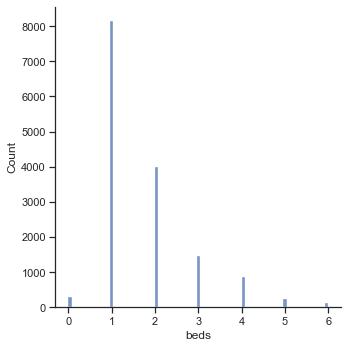

In [275]:
sns.displot(df, x="beds")

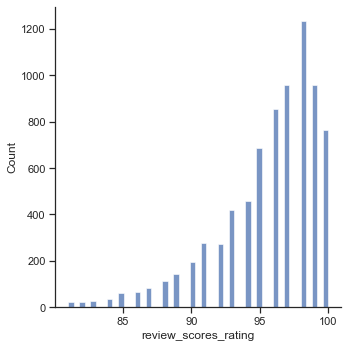

In [276]:
sns.displot(df.loc[(df["review_scores_rating"]>80)&(df["number_of_reviews"]>10)], x="review_scores_rating")

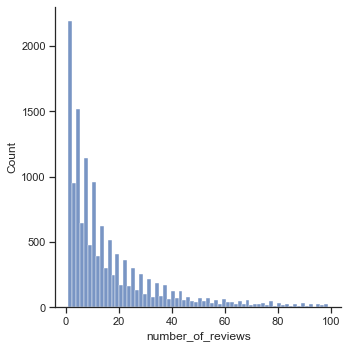

In [277]:
sns.displot(df.loc[df["number_of_reviews"]<100], x="number_of_reviews")

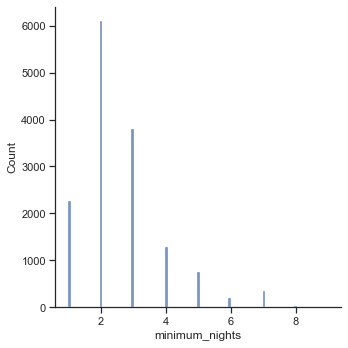

In [548]:
sns.displot(df.loc[df["minimum_nights"]<10], x="minimum_nights")

In [278]:
# plt.figure(figsize=(20, 16))
# sns.countplot(y='neighbourhood_cleansed', data=df)
# plt.show()
# plt.figure(figsize=(20, 16))
# sns.countplot(y='has_availability', data=df)
# plt.show()
# plt.figure(figsize=(20, 16))
# sns.countplot(y='neighbourhood_cleansed', data=df)
# plt.show()
# sns.barplot(x = df['price'].median(), y = df['neighbourhood_cleansed'])

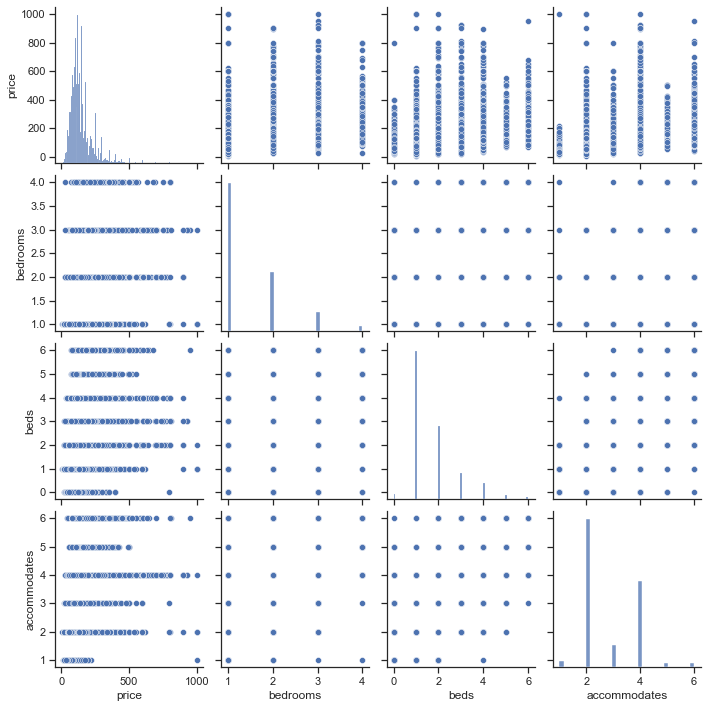

In [279]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.pairplot(df[['price',
                 'bedrooms',
                 'beds', 'accommodates'
#                  'number_of_reviews',
#                  'review_scores_rating',
                ]])

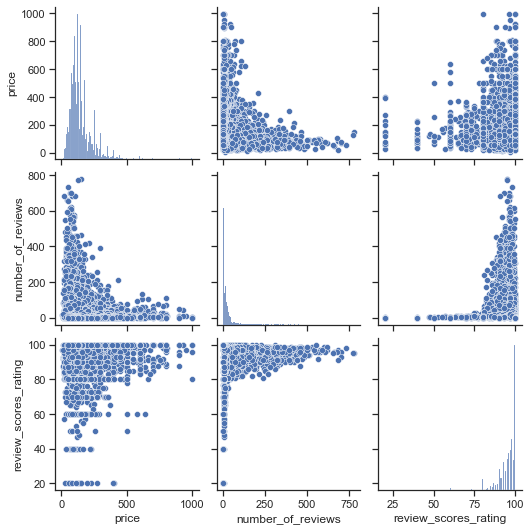

In [284]:
sns.pairplot(df[['price',
                 'number_of_reviews',
                 'review_scores_rating',
                ]])

In [285]:
# sns.pairplot(df[['price',
#                 'number_of_reviews',
#                 'reviews_per_month',
#                 'review_scores_rating',
#                 'review_scores_accuracy',
#                 'review_scores_cleanliness',
#                 'review_scores_checkin',
#                 'review_scores_communication',
#                 'review_scores_location',
#                 'review_scores_value'
#                 ]])
# df[['price',
#                 'number_of_reviews',
#                 'reviews_per_month',
#                 'review_scores_rating',
#                 'review_scores_accuracy',
#                 'review_scores_cleanliness',
#                 'review_scores_checkin',
#                 'review_scores_communication',
#                 'review_scores_location',
#                 'review_scores_value'
#                 ]].hist(figsize=(20,20), bins=100)

Price: 


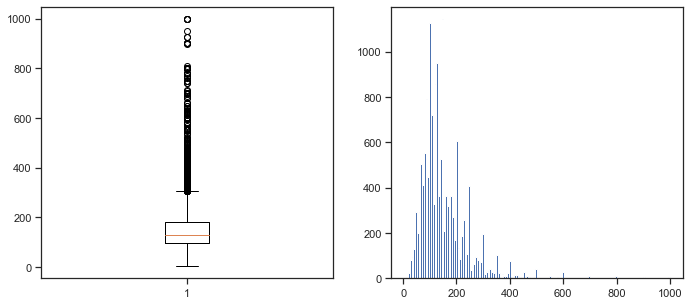

In [286]:
# Посмотрим на распределение цен на апартаменты:
series = df['price']
print('Price: ')

plt.figure(figsize=(11.5, 5))

# sp1
plt.subplot(121)
plt.boxplot(series)

# sp2
plt.subplot(122)
plt.hist(series, bins= int(len(df['price'])/100))

plt.show()

<AxesSubplot:xlabel='property_type_computed', ylabel='price'>

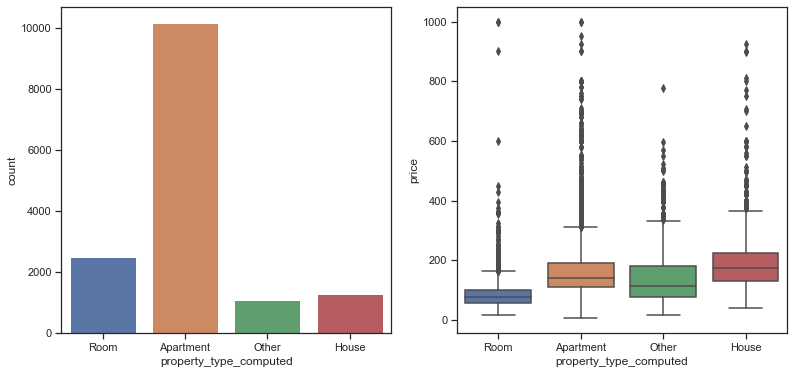

In [287]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
sns.countplot(x='property_type_computed', data=df)
plt.subplot(122)
sns.boxplot(x="property_type_computed", y="price",data=df)

<AxesSubplot:xlabel='count', ylabel='bathrooms_text'>

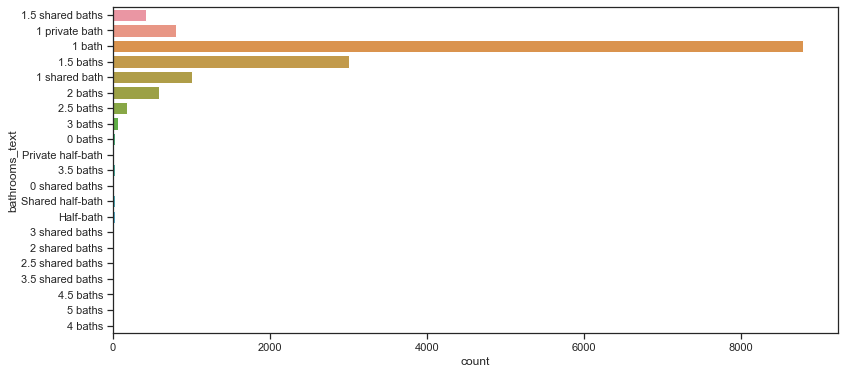

In [288]:
plt.figure(figsize=(13, 6))
sns.countplot(y='bathrooms_text', data=df)

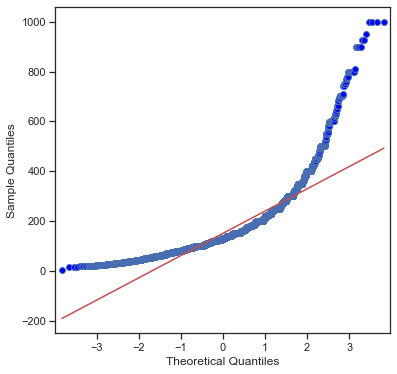

In [289]:
import statsmodels.api as sm

fig, ax = plt.subplots(figsize=(6, 6))
sm.qqplot(df['price'], ax=ax, line='s')
plt.show()

In [290]:
# Вычисляем логарифм цены
df['price_ln'] = np.log(df['price']) 

<ipython-input-290-81a63bd4c2a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_ln'] = np.log(df['price'])


<AxesSubplot:xlabel='price', ylabel='property_type_freq'>

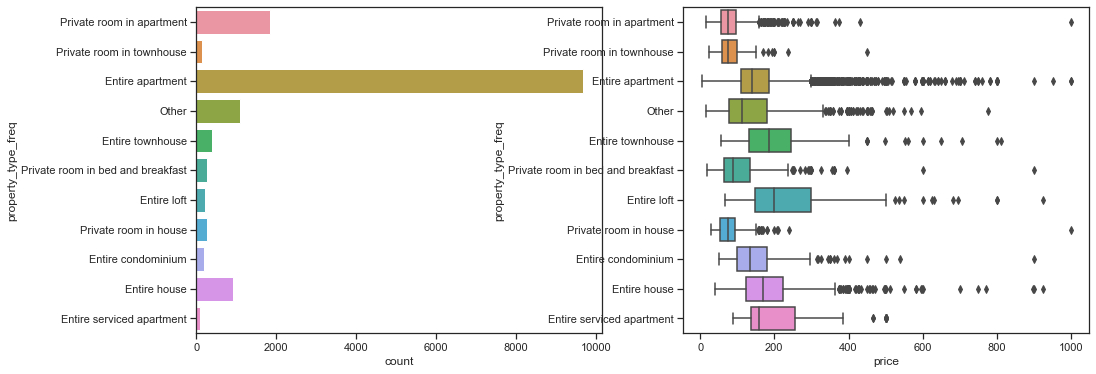

In [291]:
plt.figure(figsize=(16, 6))
plt.subplot(121)
sns.countplot(y='property_type_freq', data=df)
plt.subplot(122)
sns.boxplot(y="property_type_freq", x="price",data=df)

<AxesSubplot:xlabel='property_type_computed', ylabel='price'>

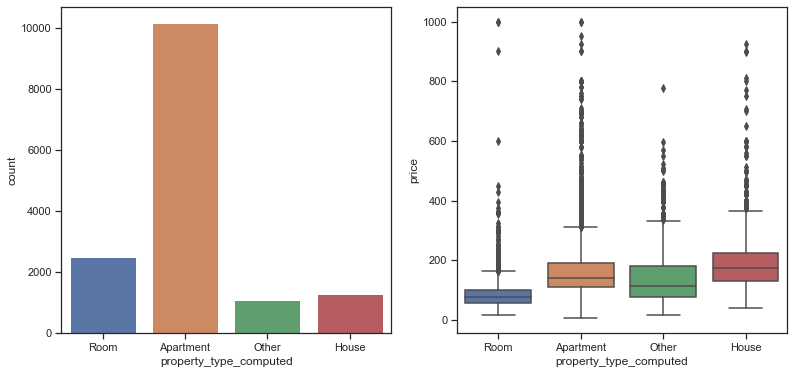

In [292]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
sns.countplot(x='property_type_computed', data=df)
plt.subplot(122)
sns.boxplot(x="property_type_computed", y="price",data=df)



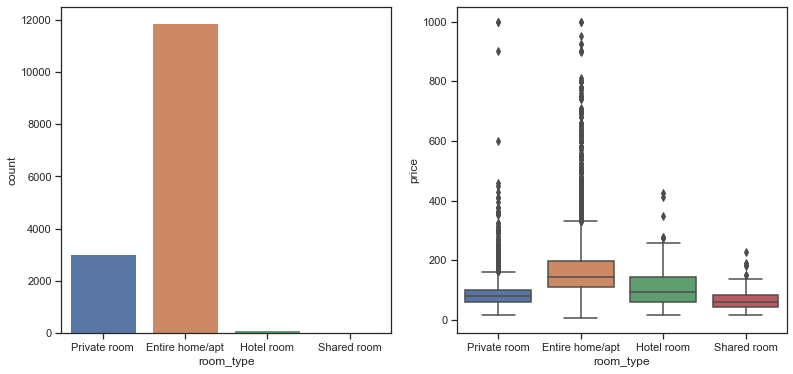

In [293]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
sns.countplot(x='room_type', data=df)
plt.subplot(122)
sns.boxplot(x="room_type", y="price",data=df)
plt.show()

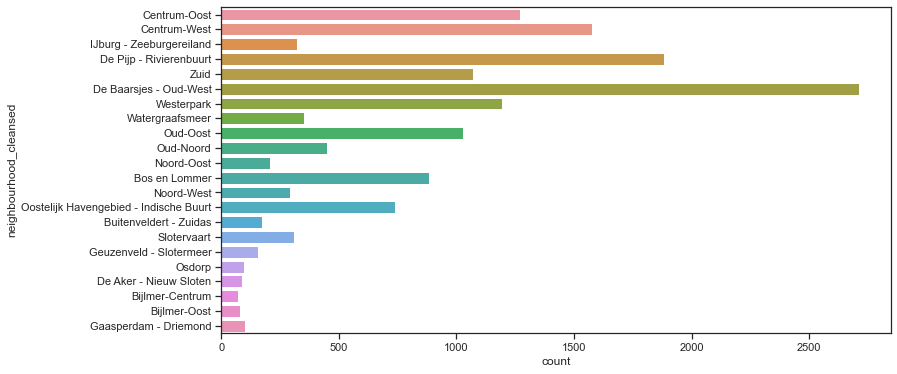

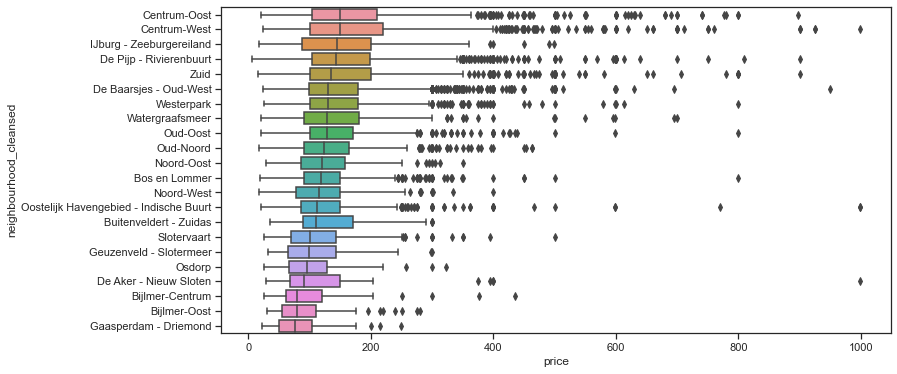

In [294]:
median_arr =  df.groupby('neighbourhood_cleansed',observed=True)['price'].transform('median')
price_ordered_df = df.loc[median_arr.sort_values(ascending=False).index]

plt.figure(figsize=(12, 6))
# plt.subplot(121)
sns.countplot(y='neighbourhood_cleansed', data=price_ordered_df)
plt.show()

plt.figure(figsize=(12, 6))
# plt.subplot(122)\
sns.boxplot(y="neighbourhood_cleansed", x="price",data=price_ordered_df)
plt.show()

### Биннинг переменных

In [295]:
# Чтобы т
# price_ordered_df[''].astype('category').cat.categories.tolist()
# df.groupby(price_df, as_index=False, observed=True).median().cat.categories.tolist()

fanciness_map = {
    'Bijlmer-Centrum': 0,
    'Bijlmer-Oost': 0,
    'Bos en Lommer': 1,
    'Buitenveldert - Zuidas': 1,
    'Centrum-Oost': 2,
    'Centrum-West': 2,
    'De Aker - Nieuw Sloten': 0,
    'De Baarsjes - Oud-West': 2,
    'De Pijp - Rivierenbuurt': 2,
    'Gaasperdam - Driemond': 0,
    'Geuzenveld - Slotermeer': 0,
    'IJburg - Zeeburgereiland': 2,
    'Noord-Oost': 1,
    'Noord-West': 1,
    'Oostelijk Havengebied - Indische Buurt': 1,
    'Osdorp': 0,
    'Oud-Noord': 1,
    'Oud-Oost': 2,
    'Slotervaart': 0,
    'Watergraafsmeer': 1,
    'Westerpark': 2,
    'Zuid': 2
}

text_map = {
    0: 'low',
    1: 'medium',
    2: 'high',
}

# df[["neighbourhood_cleansed"]].join(median_arr).sort_values('price')['neighbourhood_cleansed'].astype('category').cat.categories.tolist()

df['district_class'] = df['neighbourhood_cleansed'].map(fanciness_map).astype('int')
df['district_class_cat'] = df['district_class'].map(text_map).astype('category')

<ipython-input-295-f15f84bd0b07>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['district_class'] = df['neighbourhood_cleansed'].map(fanciness_map).astype('int')
<ipython-input-295-f15f84bd0b07>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['district_class_cat'] = df['district_class'].map(text_map).astype('category')


In [296]:
# Нарезаем цены на 2 категории для теста
df['price_binned_cat_2'] = pd.cut(df['price'], [0, 80, 150, 1000], labels=[0,1,2])
df['price_binned_2'] = df['price_binned_cat_2'].astype('int')
# df['price_binned_cat'] = less_than_upper_bound['price_binned'].astype('category')
# df['price_binned_cat_boundaries']=pd.cut(less_than_upper_bound['price'], 3).astype('category')
# df['price_binned_cat_boundaries']

<ipython-input-296-f07c1f1ed539>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_binned_cat_2'] = pd.cut(df['price'], [0, 80, 150, 1000], labels=[0,1,2])
<ipython-input-296-f07c1f1ed539>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_binned_2'] = df['price_binned_cat_2'].astype('int')


In [297]:
# Нарезаем цены на категории
CAT_NUM = 5
df['price_binned_cat'] = pd.cut(df['price'], [0,75, 150, 1000], labels=[0,1,2])
df['price_binned'] = df['price_binned_cat'].astype('int')
# df['price_binned_cat'] = less_than_upper_bound['price_binned'].astype('category')
# df['price_binned_cat_boundaries']=pd.cut(less_than_upper_bound['price'], 3).astype('category')
# df['price_binned_cat_boundaries']

<ipython-input-297-1e6fcfa60a57>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_binned_cat'] = pd.cut(df['price'], [0,75, 150, 1000], labels=[0,1,2])
<ipython-input-297-1e6fcfa60a57>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_binned'] = df['price_binned_cat'].astype('int')


In [298]:
# Нарезаем цены на категории
df['accommodates_binned'] = pd.cut(df['accommodates'],
                                   [0, 3, 10],
                                   labels=[0,1]).astype('int')
df['accommodates_binned_cat'] = df['accommodates_binned'].map({
    0: '1 to 3 acc',
    1: '4 acc or more'
}).astype('category')

# df['accommodates_binned'] = pd.cut(df['accommodates'],
#                                        [0, 3, 10]).astype('category')
# df['accommodates_binned']

<ipython-input-298-fe4e3fe15995>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['accommodates_binned'] = pd.cut(df['accommodates'],
<ipython-input-298-fe4e3fe15995>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['accommodates_binned_cat'] = df['accommodates_binned'].map({


In [299]:
# Нарезаем отзывы
df['review_rating_class'] = pd.cut(df['review_scores_rating'], [0, 70, 95, 101], labels=[0,1,2]).astype('int')
df['review_rating_class_cat'] = df['review_rating_class'].map({
    0: 'ok',
    1: 'good',
    2: 'excellent'
}).astype('category')

<ipython-input-299-f650c66f78e1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_rating_class'] = pd.cut(df['review_scores_rating'], [0, 70, 95, 101], labels=[0,1,2]).astype('int')
<ipython-input-299-f650c66f78e1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_rating_class_cat'] = df['review_rating_class'].map({


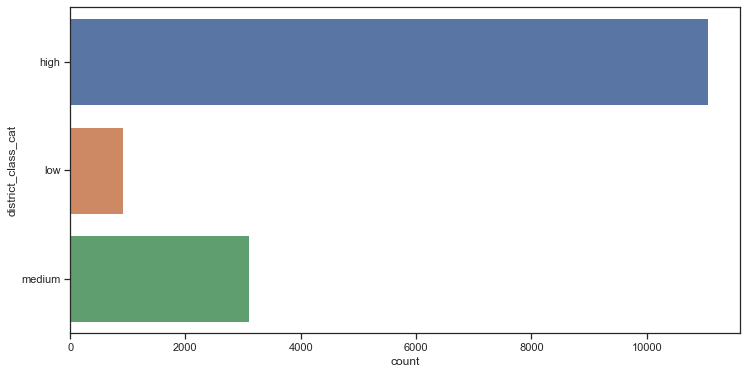

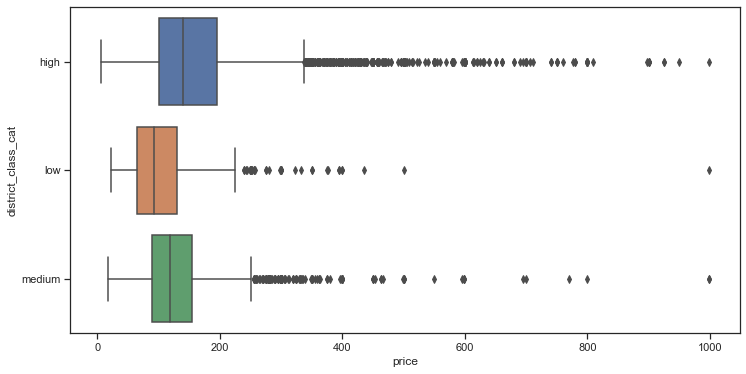

In [300]:
median_arr =  df.groupby('district_class',observed=True)['price'].transform('median')
price_ordered_df = df.loc[median_arr.sort_values(ascending=False).index]

plt.figure(figsize=(12, 6))
# plt.subplot(121)
sns.countplot(y='district_class_cat', data=price_ordered_df)
plt.show()

plt.figure(figsize=(12, 6))
# plt.subplot(122)\
sns.boxplot(y="district_class_cat", x="price",data=price_ordered_df)
plt.show()

<Figure size 432x360 with 0 Axes>

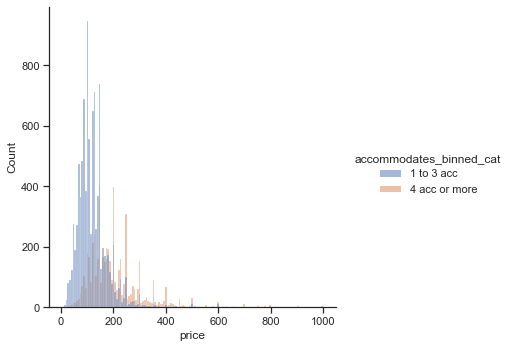

<Figure size 432x360 with 0 Axes>

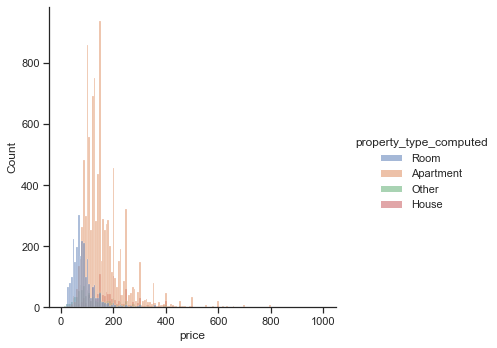

<Figure size 432x360 with 0 Axes>

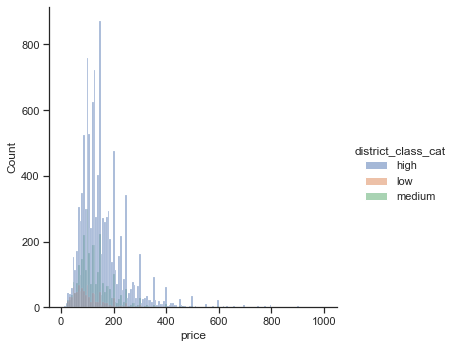

In [301]:
plt.figure(figsize=(6, 5))
sns.displot(df, x='price', bins= int(len(df['price'])/100), hue='accommodates_binned_cat')

plt.figure(figsize=(6, 5))
sns.displot(df, x='price', bins= int(len(df['price'])/100), hue='property_type_computed')

plt.figure(figsize=(6, 5))
sns.displot(df, x='price', bins= int(len(df['price'])/100), hue='district_class_cat')

In [302]:
from scipy.stats import normaltest

# normality test
stat, p = normaltest(df['price'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')
    
# normality test for log
stat, p = normaltest(df['price_ln'])
print('Log statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Log sample looks Gaussian (fail to reject H0)')
else:
	print('Log sample does not look Gaussian (reject H0)')

Statistics=8848.560, p=0.000
Sample does not look Gaussian (reject H0)
Log statistics=215.064, p=0.000
Log sample does not look Gaussian (reject H0)


Price: 


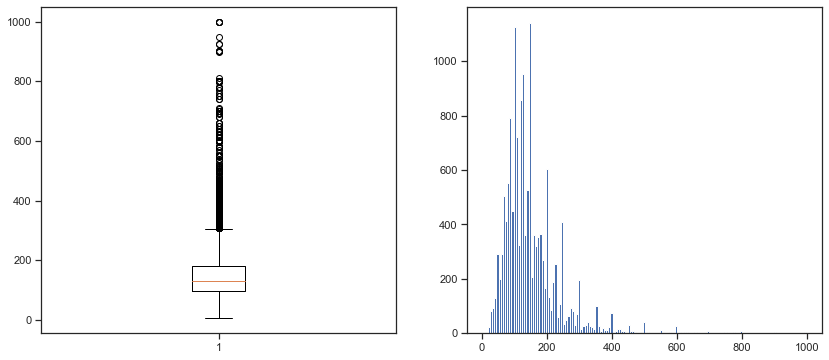

In [303]:
series = df['price']
print('Price: ')

plt.figure(figsize=(14, 6))

# sp1
plt.subplot(121)
plt.boxplot(series)

# sp2
plt.subplot(122)
plt.hist(series, bins= int(len(df['price'])/100))

plt.show()

Price: 


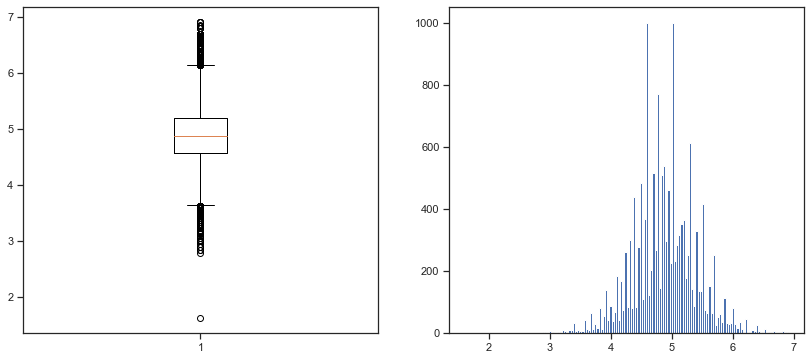

In [304]:
series = np.log(df['price'])
print('Price: ')

plt.figure(figsize=(14, 6))

# sp1
plt.subplot(121)
plt.boxplot(series)

# sp2
plt.subplot(122)
plt.hist(series, bins= int(len(df['price'])/100))

plt.show()

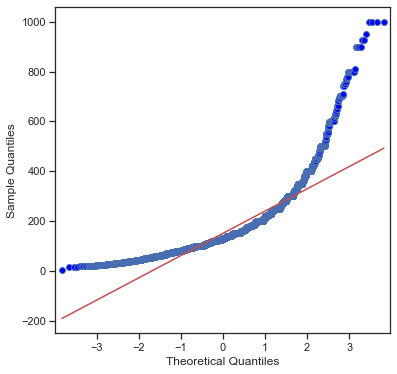

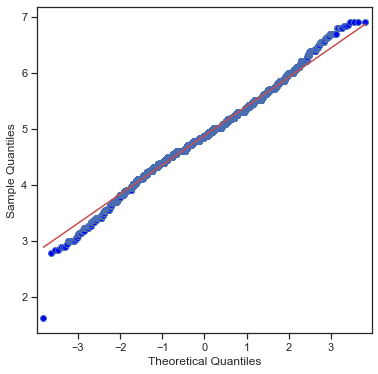

In [305]:
import statsmodels

fig, ax = plt.subplots(figsize=(6, 6))
statsmodels.graphics.gofplots.qqplot(df['price'], ax=ax, line='s')
plt.show()
import statsmodels

fig, ax = plt.subplots(figsize=(6, 6))
statsmodels.graphics.gofplots.qqplot(df['price_ln'], ax=ax, line='s')
plt.show()

In [306]:
triple_std_dev = df['price'].std(axis=0) * 3
print(triple_std_dev)
less_than_upper_bound = df.loc[(df['price'] < triple_std_dev)]
print('Percentage left: ' + str(100 * (len(less_than_upper_bound)/len(df))))
# df = less_than_upper_bound

268.20320940259444
Percentage left: 91.82469168545285


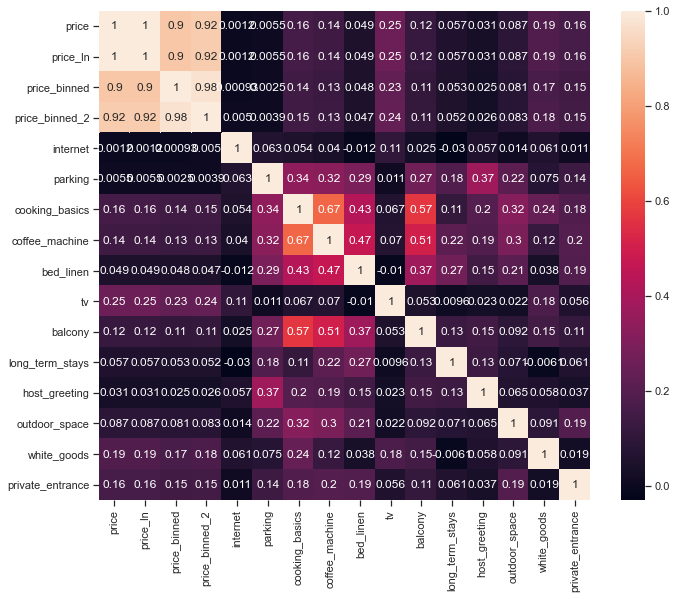

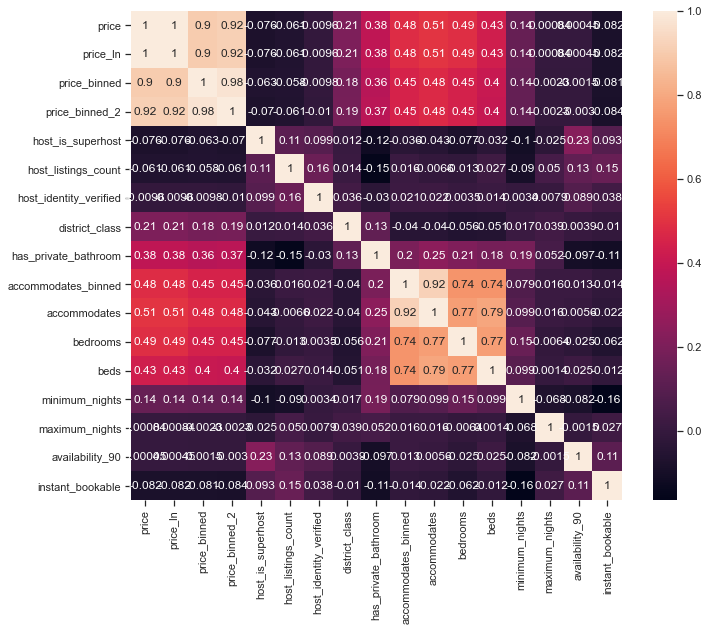

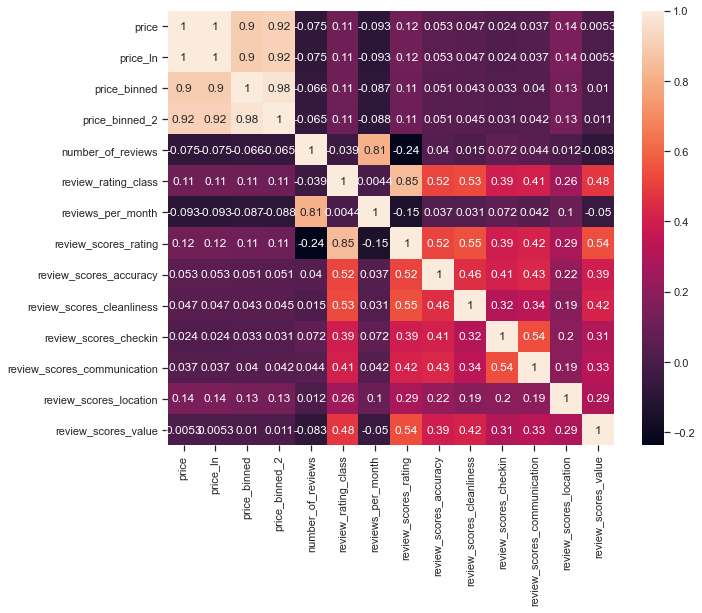

In [314]:
# from scipy.stats import spearmanr
# pearsonr([1, 2, 3], [4, 3, 7])

PRICE_LIKE_COLUMNS = ['price','price_ln','price_binned', 'price_binned_2']

# hmap_df = df.where(df['price']<=200).where(df['accommodates']<=5)
hmap_df = df

plt.figure(figsize=(11, 9))
sns.heatmap(hmap_df[PRICE_LIKE_COLUMNS+INCLUDED_AMENITIES].corr(method='spearman'), annot=True)
plt.show()

plt.figure(figsize=(11, 9))
sns.heatmap(hmap_df[PRICE_LIKE_COLUMNS+['host_is_superhost',
              'host_listings_count',
              'host_identity_verified',
#             'neighbourhood_cleansed',
              'district_class',
              'has_private_bathroom',
#               'property_type_computed',
#               'room_type',
#               'property_type_computed',
#               'property_type_freq',
              'accommodates_binned',
              'accommodates',
              'bedrooms',
              'beds',
              'minimum_nights',
              'maximum_nights',
              'availability_90',
              'instant_bookable',
]].corr(method='spearman'), annot=True)
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(hmap_df[PRICE_LIKE_COLUMNS+[
    'number_of_reviews',
    'review_rating_class',
    'reviews_per_month',
    'review_scores_rating',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value',
]].corr(method='spearman'), annot=True)
plt.show()

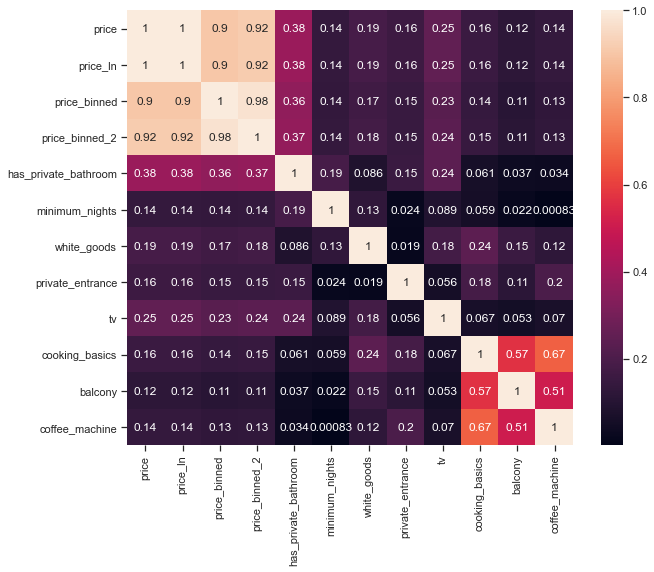

In [462]:
# Определяем данные для модели

TARGET_COLUMN = 'price_ln'
ALL_BUT_TARGET_COLUMN = df.columns[df.columns != TARGET_COLUMN]

REVIEW_PREDICTORS = [
#     'number_of_reviews',
#     'reviews_per_month',
#     'review_scores_rating',
        'review_rating_class_cat',
#     'review_scores_accuracy',
#     'review_scores_cleanliness',
#     'review_scores_checkin',
#     'review_scores_communication',
#     'review_scores_location',
#     'review_scores_value',
]

ORIGINAL_PREDICTORS = [
#     'host_is_superhost',
#               'host_listings_count',
#               'host_identity_verified',
#             'neighbourhood_cleansed',
              'district_class_cat',
              'has_private_bathroom',
              'property_type_computed',
#               'room_type',
#               'accommodates',
                  'accommodates_binned_cat',
#               'bedrooms',
              'minimum_nights',
#               'maximum_nights',
#               'availability_90',
#               'instant_bookable',
]

AMENITIES_PREDICTORS = [
    'white_goods',
    'private_entrance',
    'tv',
    'cooking_basics',
    'balcony',
    'coffee_machine'
]

PREDICTORS = ORIGINAL_PREDICTORS + AMENITIES_PREDICTORS + REVIEW_PREDICTORS

# Смотрим на ранговые корреляции предикторов
plt.figure(figsize=(10, 8))
sns.heatmap(df[PRICE_LIKE_COLUMNS+PREDICTORS].corr(method='spearman'), annot=True)
plt.show()

In [553]:
# Выбираем сабсет данных
# final_df = df .where(df['price_binned']<4)
# final_df = df .where(df['price']<=200) \
# final_df = df \
# .where(df['accommodates']<=5) \
# .where(df['property_type']=='Entire apartment')
# final_df = df
# final_df = df.loc[df['price']<600]
final_df = df.loc[(df['price']<=600)
                  &(df['number_of_reviews']>=15)
                 &(df['minimum_nights']<=6)]

print('Percentage used in modelling: ' + str(100 * (len(final_df)/orig_len)))

Percentage used in modelling: 31.47162176552018


<AxesSubplot:xlabel='price_binned_cat', ylabel='count'>

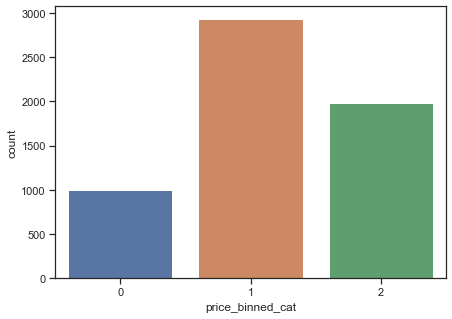

In [554]:
plt.figure(figsize=(7, 5))
sns.countplot(x='price_binned_cat', data = final_df)

<AxesSubplot:xlabel='price_binned_cat_2', ylabel='count'>

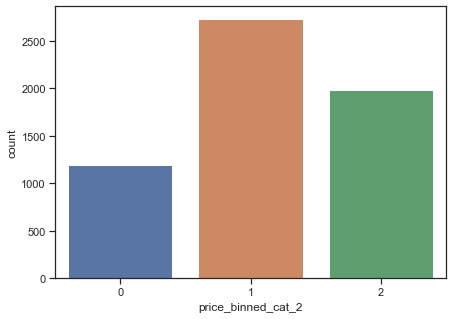

In [555]:
plt.figure(figsize=(7, 5))
sns.countplot(x='price_binned_cat_2', data = final_df)

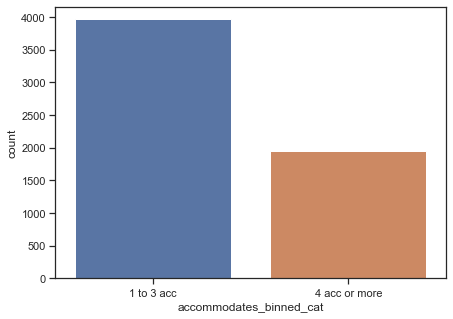

<AxesSubplot:xlabel='accommodates_binned_cat', ylabel='price'>

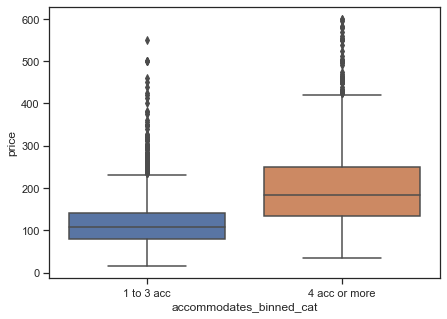

In [556]:
plt.figure(figsize=(7, 5))
sns.countplot(x='accommodates_binned_cat', data = final_df)
plt.show()
plt.figure(figsize=(7, 5))
sns.boxplot(x='accommodates_binned_cat', y='price', data = final_df)

In [557]:
import model_utils
import importlib
importlib.reload(model_utils)

<module 'model_utils' from 'C:\\Users\\Tetawex\\Desktop\\pythonProject\\model_utils.py'>

c:\users\tetawex\.virtualenvs\pythonproject-mgxhf3qj\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\tetawex\.virtualenvs\pythonproject-mgxhf3qj\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


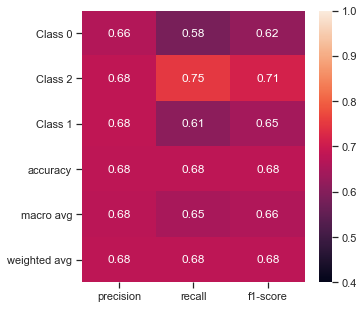

{'Class 0': {'precision': 0.6625766871165644,
  'recall': 0.5837837837837838,
  'f1-score': 0.6206896551724138,
  'support': 185},
 'Class 2': {'precision': 0.6824925816023739,
  'recall': 0.7504078303425775,
  'f1-score': 0.7148407148407148,
  'support': 613},
 'Class 1': {'precision': 0.6820809248554913,
  'recall': 0.612987012987013,
  'f1-score': 0.6456908344733242,
  'support': 385},
 'accuracy': 0.6796280642434489,
 'macro avg': {'precision': 0.6757167311914766,
  'recall': 0.6490595423711248,
  'f1-score': 0.6604070681621509,
  'support': 1183},
 'weighted avg': {'precision': 0.6792441214777546,
  'recall': 0.6796280642434489,
  'f1-score': 0.6776127774103842,
  'support': 1183}}

weight
property_type_computed_T.Room            0.423217
accommodates_binned_cat_T.4 acc or more  0.262507
has_private_bathroom                     0.084389
property_type_computed_T.Other           0.067851
district_class_cat_T.medium              0.026861
district_class_cat_T.low                 0.023992
property_type_computed_T.House           0.014893
minimum_nights                           0.013105
coffee_machine                           0.012819
white_goods                              0.012769
review_rating_class_cat_T.good           0.012520
tv                                       0.012504
balcony                                  0.012212
cooking_basics                           0.010344
private_entrance                         0.010018
Intercept                                0.000000
review_rating_class_cat_T.ok             0.000000

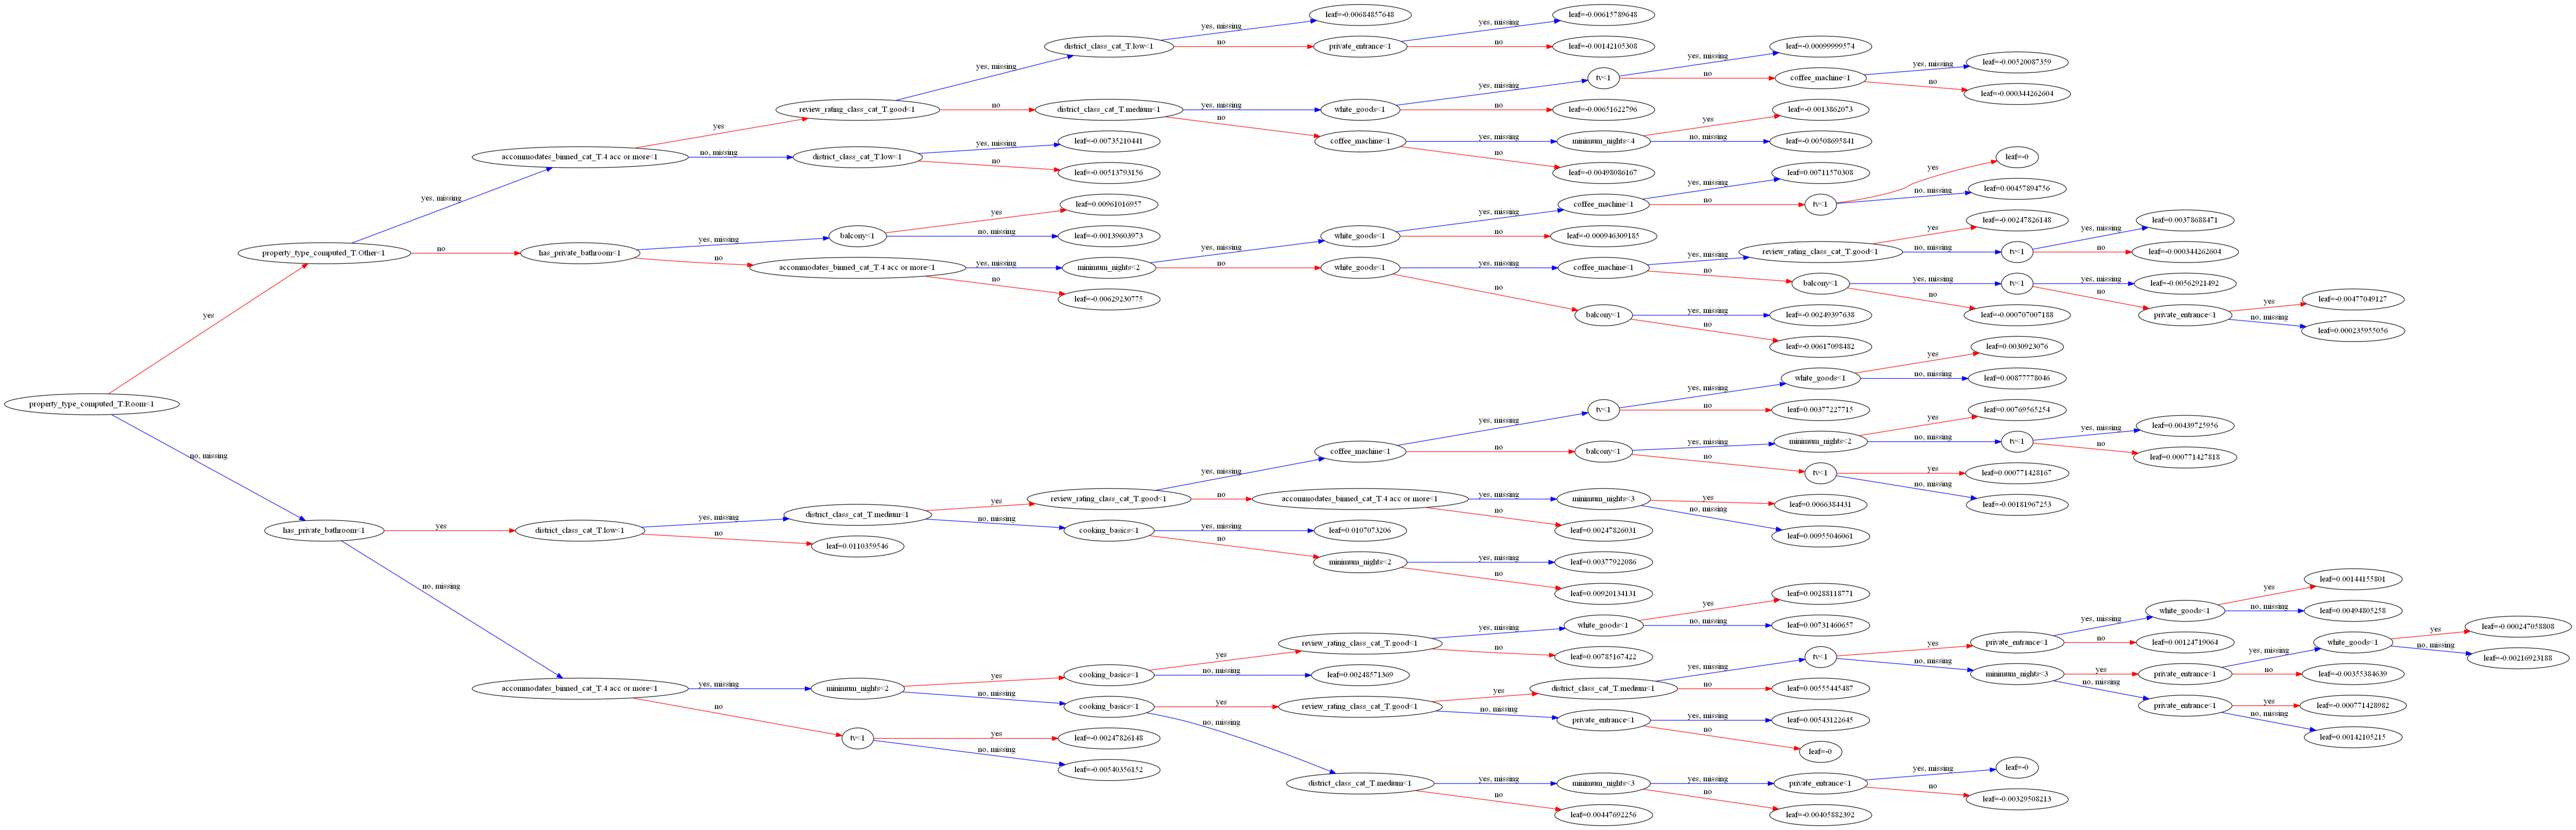

In [558]:
import xgboost as xgb

base_model = xgb.XGBClassifier(
#     objective='reg:squarederror',
#         booster='dart',
    objective='multi:softprob',
    eval_metric='mlogloss',
#                            n_jobs=8,
#                            tree_method='gpu_hist',
#                            colsample_bytree=0.7,
#                            learning_rate=0.01,
#                            max_depth=11,
#                            min_child_weight=5,
#                            alpha=0,
#                            gamma=0,
#                            n_estimators=1000,
#                            seed=123),
                                                       n_jobs=8,
                           tree_method='gpu_hist',
                           colsample_bytree=1,
                           subsample = 1,
                           learning_rate=0.01,
                           max_depth=12,
                           min_child_weight=5,
                           alpha=0.1,
                           gamma=0.1,
                           n_estimators=1000,
                           seed=123)

# Модель 0- дерево решений для категории
cl_tree_model = model_utils.process_cl_model(
    model=base_model,
#     model=xgb.XGBClassifier(objective='reg:squarederror',
#                            n_jobs=8,
#                            tree_method='gpu_hist',
#                            colsample_bytree=0.7,
#                            learning_rate=0.01,
#                            max_depth=11,
#                            min_child_weight=5,
#                            alpha=0,
#                            gamma=0,
#                            n_estimators=1000,
#                            seed=123),
#                                                        n_jobs=8,
#                            tree_method='gpu_hist',
#                            colsample_bytree=1,
#                            subsample = 1,
#                            learning_rate=0.1,
#                            max_depth=12,
#                            min_child_weight=6,
#                            alpha=0.01,
#                            gamma=0.01,
#                            n_estimators=100,
#                            seed=123),
    df=final_df,
    dependent='price_binned',
    cat_labels='price_binned_cat',
    predictors=PREDICTORS,
    print_tree=True
)

c:\users\tetawex\.virtualenvs\pythonproject-mgxhf3qj\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\tetawex\.virtualenvs\pythonproject-mgxhf3qj\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


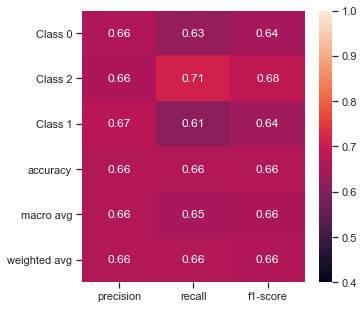

{'Class 0': {'precision': 0.6601941747572816,
  'recall': 0.6267281105990783,
  'f1-score': 0.6430260047281323,
  'support': 217},
 'Class 2': {'precision': 0.6576433121019108,
  'recall': 0.7108433734939759,
  'f1-score': 0.6832092638544252,
  'support': 581},
 'Class 1': {'precision': 0.673352435530086,
  'recall': 0.6103896103896104,
  'f1-score': 0.6403269754768393,
  'support': 385},
 'accuracy': 0.6627218934911243,
 'macro avg': {'precision': 0.6637299741297594,
  'recall': 0.6493203648275548,
  'f1-score': 0.655520748019799,
  'support': 1183},
 'weighted avg': {'precision': 0.6632236584383968,
  'recall': 0.6627218934911243,
  'f1-score': 0.6618825958444707,
  'support': 1183}}

weight
property_type_computed_T.Room            0.427927
accommodates_binned_cat_T.4 acc or more  0.256629
has_private_bathroom                     0.096401
property_type_computed_T.Other           0.067625
district_class_cat_T.low                 0.024375
district_class_cat_T.medium              0.022651
property_type_computed_T.House           0.014941
white_goods                              0.013168
tv                                       0.012616
minimum_nights                           0.012206
coffee_machine                           0.011564
balcony                                  0.010446
review_rating_class_cat_T.good           0.010242
private_entrance                         0.009651
cooking_basics                           0.009559
Intercept                                0.000000
review_rating_class_cat_T.ok             0.000000

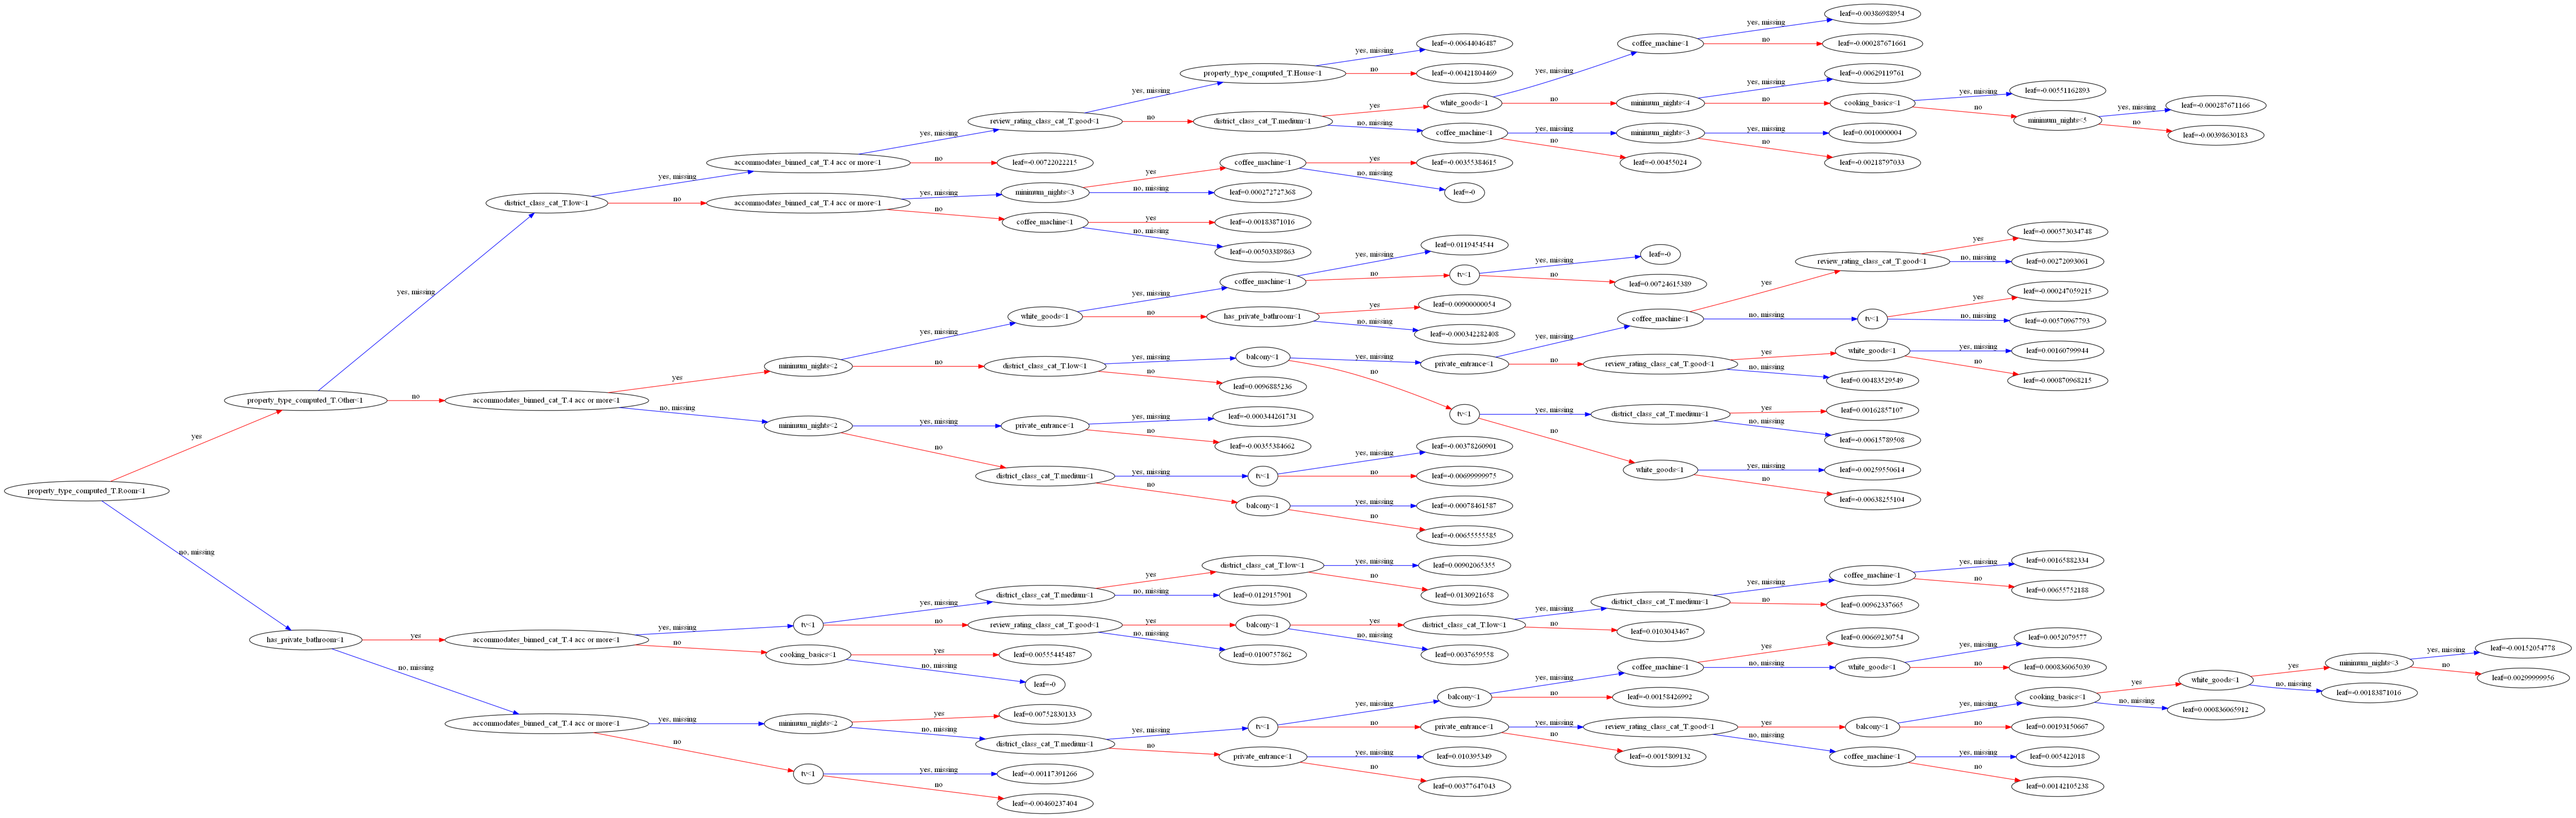

In [559]:
import xgboost as xgb

#                           tree_method='gpu_hist',
#                            colsample_bytree=0.7,
#                            learning_rate=0.01,
#                            max_depth=15,
#                            min_child_weight=5,
#                            alpha=0,
#                            gamma=0,
#                            n_estimators=1000,
#                            seed=123),

#                          colsample_bytree=0.3,
#                            learning_rate=0.01,
#                            max_depth=16,
#                            min_child_weight=5,
#                            alpha=0.1,
#                            gamma=0.1,
#                            n_estimators=1000,

#                          colsample_bytree=0.3,
#                            learning_rate=0.01,
#                            max_depth=12,
#                            min_child_weight=3,
#                            alpha=0.1,
#                            gamma=0.1,
#                            n_estimators=1000,

# Модель 0-1 - дерево решений для 2-х категорий
cl_tree_model_2 = model_utils.process_cl_model(
    model=base_model,
#     model=xgb.XGBClassifier(objective='reg:squarederror',
#                            n_jobs=8,
#                            tree_method='gpu_hist',
#                            colsample_bytree=1,
#                            subsample = 1,
#                            learning_rate=0.1,
#                            max_depth=8,
#                            min_child_weight=4,
#                            alpha=0.01,
#                            gamma=0.01,
#                            n_estimators=100,
#                            seed=123),
    df=final_df,
    dependent='price_binned_2',
    cat_labels='price_binned_cat_2',
    predictors=PREDICTORS,
    print_tree=True
)

In [536]:
import model_utils
import importlib
importlib.reload(model_utils)

<module 'model_utils' from 'C:\\Users\\Tetawex\\Desktop\\pythonProject\\model_utils.py'>

c:\users\tetawex\.virtualenvs\pythonproject-mgxhf3qj\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


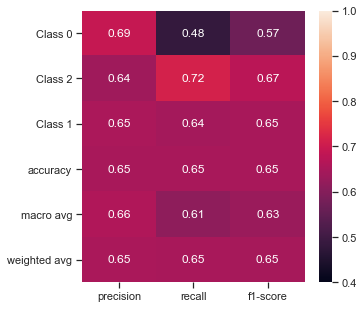

{'Class 0': {'precision': 0.6907894736842105,
  'recall': 0.4838709677419355,
  'f1-score': 0.5691056910569106,
  'support': 217},
 'Class 2': {'precision': 0.6380368098159509,
  'recall': 0.7160068846815835,
  'f1-score': 0.6747769667477697,
  'support': 581},
 'Class 1': {'precision': 0.6543535620052771,
  'recall': 0.6441558441558441,
  'f1-score': 0.6492146596858638,
  'support': 385},
 'accuracy': 0.6500422654268808,
 'macro avg': {'precision': 0.6610599485018128,
  'recall': 0.6146778988597877,
  'f1-score': 0.6310324391635147,
  'support': 1183},
 'weighted avg': {'precision': 0.6530235195812113,
  'recall': 0.6500422654268808,
  'f1-score': 0.6470743842932049,
  'support': 1183}}

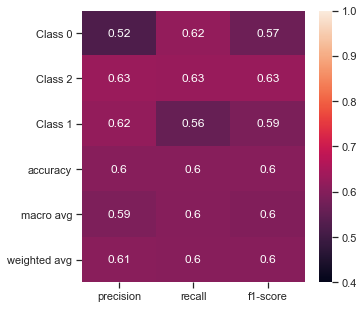

{'Class 0': {'precision': 0.5232558139534884,
  'recall': 0.6221198156682027,
  'f1-score': 0.5684210526315789,
  'support': 217},
 'Class 2': {'precision': 0.6303972366148531,
  'recall': 0.6282271944922547,
  'f1-score': 0.6293103448275861,
  'support': 581},
 'Class 1': {'precision': 0.6213872832369942,
  'recall': 0.5584415584415584,
  'f1-score': 0.588235294117647,
  'support': 385},
 'accuracy': 0.6043956043956044,
 'macro avg': {'precision': 0.5916801112684452,
  'recall': 0.6029295228673387,
  'f1-score': 0.595322230525604,
  'support': 1183},
 'weighted avg': {'precision': 0.6078118428971931,
  'recall': 0.6043956043956044,
  'f1-score': 0.6047736830102909,
  'support': 1183}}

c:\users\tetawex\.virtualenvs\pythonproject-mgxhf3qj\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


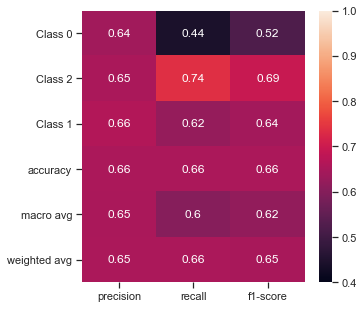

{'Class 0': {'precision': 0.640625,
  'recall': 0.44324324324324327,
  'f1-score': 0.5239616613418532,
  'support': 185},
 'Class 2': {'precision': 0.6527377521613833,
  'recall': 0.7389885807504079,
  'f1-score': 0.6931905126243305,
  'support': 613},
 'Class 1': {'precision': 0.6648199445983379,
  'recall': 0.6233766233766234,
  'f1-score': 0.6434316353887399,
  'support': 385},
 'accuracy': 0.6551141166525782,
 'macro avg': {'precision': 0.6527275655865737,
  'recall': 0.6018694824567582,
  'f1-score': 0.6201946031183079,
  'support': 1183},
 'weighted avg': {'precision': 0.6547756092521455,
  'recall': 0.6551141166525782,
  'f1-score': 0.650532435512783,
  'support': 1183}}

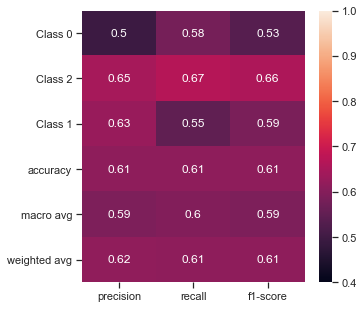

{'Class 0': {'precision': 0.49537037037037035,
  'recall': 0.5783783783783784,
  'f1-score': 0.5336658354114713,
  'support': 185},
 'Class 2': {'precision': 0.6481774960380349,
  'recall': 0.66721044045677,
  'f1-score': 0.657556270096463,
  'support': 613},
 'Class 1': {'precision': 0.6279761904761905,
  'recall': 0.548051948051948,
  'f1-score': 0.5852981969486823,
  'support': 385},
 'accuracy': 0.6145393068469992,
 'macro avg': {'precision': 0.5905080189615319,
  'recall': 0.5978802556290321,
  'f1-score': 0.5921734341522055,
  'support': 1183},
 'weighted avg': {'precision': 0.6177068105859402,
  'recall': 0.6145393068469992,
  'f1-score': 0.6146660853300903,
  'support': 1183}}

In [552]:
from sklearn.tree import DecisionTreeClassifier

cl_tree_model_3 = model_utils.process_cl_model(
    model=RidgeClassifier(normalize= True),
    df=final_df,
    dependent='price_binned_2',
    cat_labels='price_binned_cat_2',
    predictors=PREDICTORS,
    print_tree=False
)

cl_tree_model_4 = model_utils.process_cl_model(
    model=DecisionTreeClassifier(),
    df=final_df,
    dependent='price_binned_2',
    cat_labels='price_binned_cat_2',
    predictors=PREDICTORS,
    print_tree=False
)

cl_tree_model_3_1 = model_utils.process_cl_model(
    model=RidgeClassifier(normalize= True),
    df=final_df,
    dependent='price_binned',
    cat_labels='price_binned_cat',
    predictors=PREDICTORS,
    print_tree=False
)

cl_tree_model_4_1 = model_utils.process_cl_model(
    model=DecisionTreeClassifier(),
    df=final_df,
    dependent='price_binned',
    cat_labels='price_binned_cat',
    predictors=PREDICTORS,
    print_tree=False
)


# reg_model_4 = model_utils.process_model(
#     model=Ridge(normalize=True),
#     df=final_df,
#     dependent='price_ln',
#     predictors=PREDICTORS,
# )

array([[4.35842939],
       [4.79622402],
       [5.32354258],
       ...,
       [4.96338241],
       [5.39938424],
       [4.22219882]])

MSE: 0.138
Mean Error: 0.372$
R^2: 0.477
Adjusted R^2: 0.469
<class 'sklearn.linear_model._ridge.Ridge'>


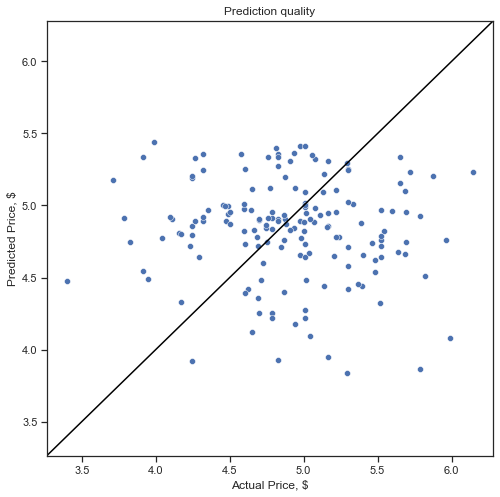

In [560]:
from sklearn.linear_model import Ridge, RidgeClassifier, ElasticNet, Lasso

reg_model_3 = model_utils.process_model(
    model=Ridge(),
    df=final_df,
    dependent='price_ln',
    predictors=PREDICTORS,
)

### Пробуем предсказывать не класс цены, а цену/логарифм цены

array([4.5299754, 4.7870936, 5.271115 , ..., 4.9133162, 5.389795 ,
       4.232056 ], dtype=float32)

MSE: 0.145
Mean Error: 0.381$
R^2: 0.450
Adjusted R^2: 0.442
<class 'xgboost.sklearn.XGBRegressor'>


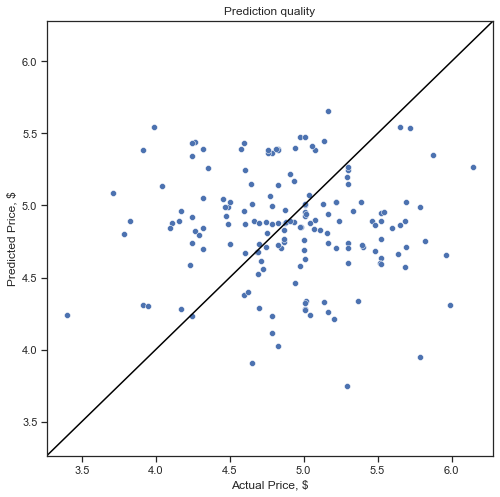

In [561]:
import xgboost as xgb

# Модель 1 - деревья решений
tree_model = model_utils.process_model(
    model=xgb.XGBRegressor(objective='reg:squarederror',
                           n_jobs=8,
                           tree_method='gpu_hist',
                           colsample_bytree=1,
                           subsample = 1,
                           learning_rate=0.01,
                           max_depth=9,
                           min_child_weight=4,
                           alpha=0,
                           gamma=0,
                           n_estimators=1000,
                           seed=123),
    df=final_df,
    dependent=TARGET_COLUMN,
    predictors=PREDICTORS)

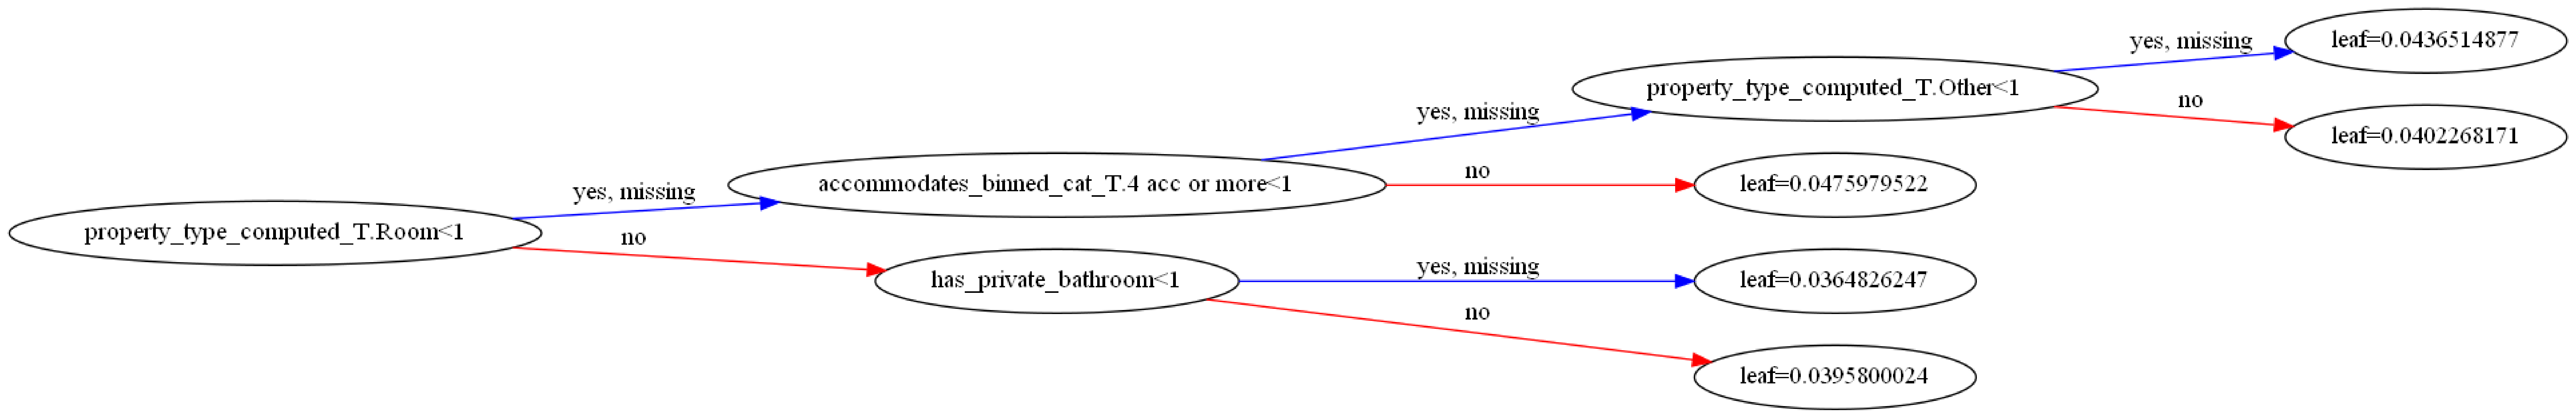

In [562]:
import graphviz
import os
os.environ["PATH"] += os.pathsep + 'D:/Program Files/Graphviz/bin/' # Можно добавить graphviz руками
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 80,120

# Рисуем дерево
xgb.plot_tree(tree_model, num_trees=0, rankdir='LR');
fig = plt.gcf()
fig.set_size_inches(150, 100)
fig.savefig('tree.png')

MSE: 0.206
Mean Error: 0.454$
R^2: 0.215
Adjusted R^2: 0.206


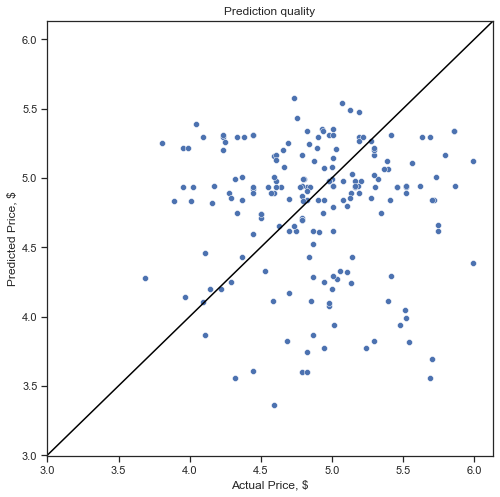

In [392]:
# Модель 2 - регрессия с бустингом
reg_model = model_utils.process_model(
    model=xgb.XGBRegressor(objective ='reg:squarederror',
                          booster='gblinear',
                          learning_rate = 0.01,
                          reg_alpha = 0,
                          reg_lambda = 0,
                          n_jobs = 8,
                          n_estimators = 1000,
                          seed=123),
    df=final_df,
    dependent=TARGET_COLUMN,
    predictors=PREDICTORS)

In [ ]:
from sklearn import linear_model

# Модель 1-2 - лассо-регрессия
reg_model = model_utils.process_model(
    model=xgb.XGBRegressor(objective ='reg:squarederror',
                          booster='gblinear',
                          learning_rate = 0.01,
                          reg_alpha = 0,
                          reg_lambda = 0,
                          n_jobs = 8,
                          n_estimators = 1000,
                          seed=123),
    df=final_df,
    dependent=TARGET_COLUMN,
    predictors=PREDICTORS)

In [563]:
import statsmodels.api as sm
from patsy import dmatrices

y, X = dmatrices(TARGET_COLUMN + ' ~ ' + (' + '.join(PREDICTORS)), data=df, return_type='dataframe')

# Модель 3 регрессия методом наим. квадратов
model = sm.OLS(y, X)
result = model.fit()
display(result.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               price_ln   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     715.7
Date:                Thu, 24 Dec 2020   Prob (F-statistic):               0.00
Time:                        06:33:28   Log-Likelihood:                -7321.9
No. Observations:               15082   AIC:                         1.468e+04
Df Residuals:                   15065   BIC:                         1.481e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                    4.5486      0.019    241.828      0.000       4.512       4.585
district_class_cat[T.low]                   -0.2949      0.014    -21.283      0.000      -0.322      -0.268
district_class_cat[T.medium]                -0.1907      0.008    -23.387      0.000      -0.207      -0.175
property_type_computed[T.House]              0.0512      0.012      4.133      0.000       0.027       0.076
property_type_computed[T.Other]             -0.1445      0.013    -10.933      0.000      -0.170      -0.119
property_type_computed[T.Room]              -0.3582      0.012    -29.093      0.000      -0.382      -0.334
accommodates_binned_cat[T.4 acc or more]     0.3989      0.007     55.057      0.000       0.385       0.413
review_rating_class_cat[T.good]             -0.0675      0.007     -9.858      0.000      -0.081      -0.054
review_rating_class_cat[T.ok]               -0.0146      0.030     -0.490      0.624      -0.073       0.044
has_private_bathroom                         0.1727      0.015     11.760      0.000       0.144       0.201
minimum_nights                               0.0004      0.000      1.775      0.076   -4.08e-05       0.001
white_goods                                  0.0473      0.009      5.149      0.000       0.029       0.065
private_entrance                             0.0445      0.007      6.316      0.000       0.031       0.058
tv                                           0.1054      0.008     12.754      0.000       0.089       0.122
cooking_basics                              -0.0117      0.010     -1.213      0.225      -0.031       0.007
balcony                                      0.0370      0.009      4.209      0.000       0.020       0.054
coffee_machine                               0.0743      0.009      8.229      0.000       0.057       0.092
==============================================================================
Omnibus:                      810.304   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2140.234
Skew:                           0.295   Prob(JB):                         0.00
Kurtosis:                       4.749   Cond. No.                         140.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Старые модели:

In [567]:
# Готовим датасет для моделей
from patsy import dmatrices
import seaborn as sns

# Уравнение регрессии
equation = TARGET_COLUMN + ' ~ ' + (' + '.join(PREDICTORS))

data_to_transform = df.where(df['property_type_computed'] == 'Apartment')
# data_to_transform = df

y, X = dmatrices(equation, data=data_to_transform, return_type='dataframe')

renamer = lambda x: x.replace('[', '_').replace(']', '')

y = y.rename(columns = renamer)
X = X.rename(columns = renamer)

In [568]:
# Разбиваем выборку
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
# Градиентиный бустинг c деревьями
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import xgboost as xgb
import numpy as np

data_dmatrix = xgb.DMatrix(data=X_train,label=y_train)

In [ ]:
from sklearn.model_selection import GridSearchCV


# Выполняется долго, можно сходить попить чайку
# Пробуем перебрать разные модели:

# param_test1 = {
#     'max_depth': range(1,10,2),
#     'min_child_weight': range(1,10,2)
#     'colsample_bytree': [0.3, 0.9],
#     'colsample_bytree': np.arange(0.3, 1, 0.1),
#     'alpha': np.arange(0, 1, 0.1),
#     'gamma': np.arange(0, 1, 0.1),
#       'alpha': [0, 0.01],
#       'gamma': [0, 0.01],
#     'learning_rate': range(0, 1, 0.1),
#     'n_estimators': [10, 50, 100]
# }
# gsearch1 = GridSearchCV(estimator = xgb.XGBRegressor(objective ='reg:squarederror',
#                           n_jobs = 8,
#                           tree_method='gpu_hist',
#                           colsample_bytree = 0.5,
#                           learning_rate = 0.01,
#                           max_depth = 5,
#                           min_child_weight = 3,
#                           alpha = 0,
#                           gamma = 0,
#                           n_estimators = 500,
#                           seed=123),
#                         param_grid = param_test1, scoring='r2',n_jobs=8, cv=5, verbose=1)
# gsearch1.fit(X_train,y_train) 
# gsearch1.cv_results_ , gsearch1.best_params_, gsearch1.best_score_

In [ ]:
# Параметры для сгруппированных гео-предикторов
# xg_reg = xgb.XGBRegressor(objective ='reg:squarederror',
#                           n_jobs = 8,
#                           tree_method='gpu_hist',
#                           colsample_bytree = 0.5,
#                           learning_rate = 0.01,
#                           max_depth = 5,
#                           min_child_weight = 3,
#                           alpha = 0.0,
#                           gamma = 0.0,
#                           n_estimators = 1000,
#                           seed=123)

xg_reg = xgb.XGBRegressor(objective ='reg:squarederror',
                          n_jobs = 8,
                          tree_method='gpu_hist',
                          colsample_bytree = 0.4,
                          learning_rate = 0.01,
                          max_depth = 9,
                          min_child_weight = 4,
                          alpha = 0,
                          gamma = 0,
                          n_estimators = 1000,
                          seed=123)

xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))
r2 = r2_score(y_test, preds)
adjusted_r_2 = 1 - (1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1)

print('MSE: %.3f' % mse)
print('Mean Error: %.3f$' % rmse)
print('R^2: %.3f' % r2)
print('Adjusted R^2: %.3f' % adjusted_r_2)
print(xg_reg)

In [ ]:
# y_test['price']

pred_scatter_index = range(0, len(y_test))

vec_test = pd.Series(y_test['price'], index = pred_scatter_index, dtype='float')
vec_pred = pd.Series(preds, index = pred_scatter_index, dtype='float')
        
frame = { 'Actual Price, $': vec_test, 'Predicted Price, $': vec_pred,} 
  
comp_df = pd.DataFrame(frame, index=pred_scatter_index)
# .join(data_to_transform['property_type_computed'].reindex(pred_scatter_index))

plt.figure(figsize=(8, 8))
plt.axline((0, 0), (400, 400), color='black')
# plt.axline((1.2, 1.2), (1.8, 1.8), color='black')
sns.scatterplot(x='Actual Price, $',
                y='Predicted Price, $',
#                 hue='property_type_computed',
                data=comp_df).set_title('Prediction quality')

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(15, 15))

ax1.axline((0, 0), (400, 400), color='black')
sns.scatterplot(x='Actual Price, $',
                y='Predicted Price, $',
                ax=ax1,
                color='#DD8452',
                data=comp_df.where(df['property_type_computed']=='Apartment')).set_title('Prediction quality: Apartment')

ax2.axline((0, 0), (400, 400), color='black')
sns.scatterplot(x='Actual Price, $',
                y='Predicted Price, $',
                ax=ax2,
                color='#4C72B0',
                data=comp_df.where(df['property_type_computed']=='Room')).set_title('Prediction quality: Room')


ax3.axline((0, 0), (400, 400), color='black')
sns.scatterplot(x='Actual Price, $',
                y='Predicted Price, $',
                ax=ax3,
                color='#C44E52',
                data=comp_df.where(df['property_type_computed']=='House')).set_title('Prediction quality: House')

ax4.axline((0, 0), (400, 400), color='black')
sns.scatterplot(x='Actual Price, $',
                y='Predicted Price, $',
                ax=ax4,
                color='#55A868',
                data=comp_df.where(df['property_type_computed']=='Other')).set_title('Prediction quality: Other')

In [ ]:
ft_weights_xgb_reg = pd.DataFrame(xg_reg.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_xgb_reg.sort_values('weight', ascending=False, inplace=True)
ft_weights_xgb_reg

In [ ]:
import graphviz
import os
os.environ["PATH"] += os.pathsep + 'D:/Program Files/Graphviz/bin/' # Можно добавить graphviz руками
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 80,120

# xgb.plot_tree(xg_reg, rankdir='LR'); plt.show()
xgb.plot_tree(xg_reg, num_trees=0, rankdir='LR');
fig = plt.gcf()
fig.set_size_inches(150, 100)
fig.savefig('tree.png')
# xgb.plot_tree(xg_reg, num_trees=0, rankdir='LR'); plt.show()

In [ ]:
# param_test1 = {
#     'alpha': np.arange(0, 1, 0.1),
#     'lambda': np.arange(0, 1, 0.1),
#     'learning_rate': [0.01],
#     'n_estimators': [1000]
# }
# gsearch1 = GridSearchCV(estimator = xgb.XGBRegressor(objective ='reg:squarederror',
#                                               booster='gblinear',
#                                               learning_rate = 0.01,
#                                               alpha = 0.4,
#                                               n_jobs = 8,
#                                               n_estimators = 1000),
#                         param_grid = param_test1, scoring='r2',n_jobs=8, cv=5, verbose=1)
# gsearch1.fit(X_train,y_train) 
# gsearch1.cv_results_ , gsearch1.best_params_, gsearch1.best_score_

In [ ]:
# Попробуем регрессионный бустинг
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import xgboost as xgb
import numpy as np

xg_reg_linear = xgb.XGBRegressor(objective ='reg:squarederror',
                          booster='gblinear',
                          learning_rate = 0.01,
                          reg_alpha = 0,
                          reg_lambda = 0,
                          n_jobs = 8,
                          n_estimators = 1000)

xg_reg_linear.fit(X_train,y_train)

preds_lin = xg_reg_linear.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, preds_lin)
rmse = np.sqrt(mean_squared_error(y_test, preds_lin))
r2 = r2_score(y_test, preds_lin)
adjusted_r_2 = 1 - (1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1)

print('MSE: %.3f' % mse)
print('Mean Error: %.3f$' % rmse)
print('R^2: %.3f' % r2)
print('Adjusted R^2: %.3f' % adjusted_r_2)
print(xg_reg_linear)

In [ ]:
pred_scatter_index_lin = range(0, len(y_test))

vec_test_lin = pd.Series(y_test['price'], index = pred_scatter_index_lin, dtype='float')
vec_pred_lin = pd.Series(preds_lin, index = pred_scatter_index_lin, dtype='float')
        
frame = { 'Actual Price, $': vec_test_lin, 'Predicted Price, $': vec_pred_lin,} 
  
comp_df_lin = pd.DataFrame(frame, index=pred_scatter_index_lin).join(df['property_type_computed'].reindex(pred_scatter_index_lin))

plt.figure(figsize=(8, 8))
plt.axline((0, 0), (400, 400), color='black')
sns.scatterplot(x='Actual Price, $',
                y='Predicted Price, $',
                hue='property_type_computed',
                data=comp_df_lin).set_title('Prediction quality')

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(15, 15))

ax1.axline((0, 0), (400, 400), color='black')
sns.scatterplot(x='Actual Price, $',
                y='Predicted Price, $',
                ax=ax1,
                color='#DD8452',
                data=comp_df_lin.where(df['property_type_computed']=='Apartment')).set_title('Prediction quality: Apartment')

ax2.axline((0, 0), (400, 400), color='black')
sns.scatterplot(x='Actual Price, $',
                y='Predicted Price, $',
                ax=ax2,
                color='#4C72B0',
                data=comp_df_lin.where(df['property_type_computed']=='Room')).set_title('Prediction quality: Room')


ax3.axline((0, 0), (400, 400), color='black')
sns.scatterplot(x='Actual Price, $',
                y='Predicted Price, $',
                ax=ax3,
                color='#C44E52',
                data=comp_df_lin.where(df['property_type_computed']=='House')).set_title('Prediction quality: House')

ax4.axline((0, 0), (400, 400), color='black')
sns.scatterplot(x='Actual Price, $',
                y='Predicted Price, $',
                ax=ax4,
                color='#55A868',
                data=comp_df_lin.where(df['property_type_computed']=='Other')).set_title('Prediction quality: Other')

In [ ]:
# ft_weights_xgb_reg = pd.DataFrame(xg_reg_linear.feature_importances_, columns=['weight'], index=X_train.columns)
# ft_weights_xgb_reg.sort_values('weight', ascending=False, inplace=True)
# ft_weights_xgb_reg

# Вывод: деревья лучше, но не понятно, как они работают

In [ ]:
# Пробуем использовать либу для обычной регрессии
import numpy as np
import statsmodels.api as sm
from patsy import dmatrices

model = sm.OLS(y_train, X_train)
# result = model.fit_regularized(method='elastic_net',alpha=0.01, L1_wt=0.5)
result = model.fit()
display(result.summary())

In [ ]:
y_pred_ols = result.predict(X_test)
mse = mean_squared_error(y_test, y_pred_ols)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_ols))
r2 = r2_score(y_test, y_pred_ols)
adjusted_r_2 = 1 - (1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1)

print('MSE: %.3f' % mse)
print('Mean Error: %.3f$' % rmse)
print('R^2: %.3f' % r2)
print('Adjusted R^2: %.3f' % adjusted_r_2)

In [ ]:
pred_scatter_index_ols = range(0, len(y_test))

vec_test_ols = pd.Series(y_test['price'], index = pred_scatter_index_ols, dtype='float')
vec_pred_ols = pd.Series(y_pred_ols, index = pred_scatter_index_ols, dtype='float')
        
frame = { 'Actual Price, $': vec_test_ols, 'Predicted Price, $': vec_pred_ols,} 
  
comp_df_ols = pd.DataFrame(frame, index=pred_scatter_index_ols).join(df['property_type_computed'].reindex(pred_scatter_index_ols))

plt.figure(figsize=(8, 8))
plt.axline((0, 0), (400, 400), color='black')
sns.scatterplot(x='Actual Price, $',
                y='Predicted Price, $',
                hue='property_type_computed',
                data=comp_df_ols).set_title('Prediction quality')

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(15, 15))

ax1.axline((0, 0), (400, 400), color='black')
sns.scatterplot(x='Actual Price, $',
                y='Predicted Price, $',
                ax=ax1,
                color='#DD8452',
                data=comp_df_ols.where(df['property_type_computed']=='Apartment')).set_title('Prediction quality: Apartment')

ax2.axline((0, 0), (400, 400), color='black')
sns.scatterplot(x='Actual Price, $',
                y='Predicted Price, $',
                ax=ax2,
                color='#4C72B0',
                data=comp_df_ols.where(df['property_type_computed']=='Room')).set_title('Prediction quality: Room')


ax3.axline((0, 0), (400, 400), color='black')
sns.scatterplot(x='Actual Price, $',
                y='Predicted Price, $',
                ax=ax3,
                color='#C44E52',
                data=comp_df_ols.where(df['property_type_computed']=='House')).set_title('Prediction quality: House')

ax4.axline((0, 0), (400, 400), color='black')
sns.scatterplot(x='Actual Price, $',
                y='Predicted Price, $',
                ax=ax4,
                color='#55A868',
                data=comp_df_ols.where(df['property_type_computed']=='Other')).set_title('Prediction quality: Other')

In [571]:
# Попробуем многослойный персептрон

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPRegressor

import numpy as np


mlp_reg = MLPRegressor(hidden_layer_sizes=(100, ),
             activation='relu',
             solver='adam',
             alpha=0.0001,
             batch_size='auto',
             learning_rate='adaptive',
             learning_rate_init=0.01,
             power_t=0.5, max_iter=5000,
             shuffle=True,
             random_state=123,
             tol=0.0001,
             verbose=False,
             warm_start=False,
             momentum=0.8,
             nesterovs_momentum=True,
             early_stopping=False,
             validation_fraction=0.1,
             beta_1=0.9, beta_2=0.999,
             epsilon=1e-08,
             n_iter_no_change=200,
             max_fun=15000)

mlp_reg.fit(X_train,y_train)

c:\users\tetawex\.virtualenvs\pythonproject-mgxhf3qj\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MLPRegressor(learning_rate='adaptive', learning_rate_init=0.01, max_iter=5000,
             momentum=0.8, n_iter_no_change=200, random_state=123)

In [572]:
mlp_reg_pred = mlp_reg.predict(X_test)
mse = mean_squared_error(y_test, mlp_reg_pred)
rmse = np.sqrt(mean_squared_error(y_test, mlp_reg_pred))
r2 = r2_score(y_test, mlp_reg_pred)
adjusted_r_2 = 1 - (1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1)

print('MSE: %.3f' % mse)
print('Mean Error: %.3f$' % rmse)
print('R^2: %.3f' % r2)
print('Adjusted R^2: %.3f' % adjusted_r_2)

MSE: 0.144
Mean Error: 0.379$
R^2: 0.242
Adjusted R^2: 0.241


In [574]:
pred_scatter_index_mlp = range(0, len(y_test))

vec_test_mlp = pd.Series(y_test, index = pred_scatter_index_mlp, dtype='float')
vec_pred_mlp = pd.Series(mlp_reg_pred, index = pred_scatter_index_mlp, dtype='float')
        
frame = { 'Actual Price, $': vec_test_mlp, 'Predicted Price, $': vec_pred_mlp,} 
  
comp_df_mlp = pd.DataFrame(frame, index=pred_scatter_index_mlp)

plt.figure(figsize=(8, 8))
plt.axline((0, 0), (400, 400), color='black')
sns.scatterplot(x='Actual Price, $',
                y='Predicted Price, $',
                hue='property_type_computed',
                data=comp_df_mlp).set_title('Prediction quality')

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
# Линейная модель с порезанным числом предикторов:
